# DATA EXPLORATION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the data
data=pd.read_csv('hypothyroid_classification.csv')

#read the data
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


Data Overview:
The dataset hypothyroid_classification.csv appears to contain information related to thyroid conditions, including various medical indicators and demographic data. There are 30 columns/predictors in total.

In [3]:
data.info() #summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

Observations and Insights:

1.Non-Null Count:All columns have 3772 non-null entries, which suggests that there are no missing values in the dataset. However, this needs further validation as the missing values might be represented by placeholders such as ?.

2.Data Types:All columns are currently of the object type, indicating that even numerical values are read as strings. This implies the need for type conversion, particularly for numerical columns.

3.Missing Value Representation:Some columns have missing values represented by ?.These need to be identified and handled.

4.Categorical Columns:Columns like sex, on thyroxine, query on thyroxine, and others are categorical and will require encoding (e.g., one-hot encoding or label encoding).

5.Numerical Columns:Columns like age, TSH, T3, TT4, T4U, and FTI should be converted to numerical types (e.g., float or int) for proper analysis and modeling.


In [4]:
#check for missing values
data.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

Observations and Insights:

Although there are no missing values (NaN), the dataset might still have missing values represented by placeholders such as ?. This should be checked and handled.

In [5]:
#calculating number of ? in each column, since these can also be treated as missing values
df=pd.DataFrame(data)
def count_question_marks(df):
    return df.apply(lambda x: (x=='?').sum())

#Calculate the number of "?' in each column
question_mark_counts=count_question_marks(df)

#Display the counts
print(question_mark_counts)

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

Observations and Insights:

There are several columns contain ? which should be treated as missing values.
age has 1 missing value.
sex has 150 missing values.
TSH has 369 missing values.
T3 has 769 missing values.
TT4 has 231 missing values.
T4U has 387 missing values.
FTI has 385 missing values.
TBG has 3772 missing values (all values are missing).


# DATA TREATMENT AND CLEANING

In [7]:
#Since there are 3772 missing values in TBG, which is equal to total number of data rows, we can drop that column
#Drop TBG
df=df.drop(columns=['TBG'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

Observations and Insights:

After dropping the TBG column, the dataset becomes cleaner and more manageable for further analysis.

In [9]:
##replace the missing values, '?' with median of the respective column if values are numerical else mode

#Replace '?' in all columns with NaN
df= df.replace('?',np.nan)

#Identify categorical and numerical columns
categorical_columns=[]
numerical_columns=[]

#Convert columns to appropriate types and handle missing values
for col in df.columns:
    #Convert column to numeric if possible
    try:
        df[col]=pd.to_numeric(df[col])
        #if conversion is successful, it's numerical
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace= True)
            numerical_columns.append(col)
    except ValueError:
        df[col].fillna(df[col].mode()[0], inplace=True)
        categorical_columns.append(col)

print(df.head())
    

    age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41.0   F            f                  f                         f    f   
1  23.0   F            f                  f                         f    f   
2  46.0   M            f                  f                         f    f   
3  70.0   F            t                  f                         f    f   
4  70.0   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid  ...   T3  \
0        f               f              f                 f  ...  2.5   
1        f               f              f                 f  ...  2.0   
2        f               f              f                 f  ...  2.0   
3        f               f              f                 f  ...  1.9   
4        f               f              f                 f  ...  1.2   

  TT4 measured    TT4 T4U measured   T4U FTI measured    FTI  TBG measured  \
0            t

C:\Users\hp\AppData\Local\Temp\ipykernel_1532\2764451801.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace= True)


Observations and Insights:

Data Cleaning:Missing values denoted by ? have been replaced with the median for numerical columns and the mode for categorical columns.
The TBG column, which had all values missing, was successfully dropped.

Column Types:The dataset contains both numerical and categorical columns, which have been correctly identified and processed.
Numerical columns were converted to numeric types and missing values filled with the median.
Categorical columns were kept as object types and missing values filled with the mode.

In [10]:
#check if datatype of numeric columns have been changed, so that further processing can be done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

Observations and Insights:

The dataset contains both numerical and categorical columns, which have been successfull identified and processed.

In [11]:
#Cross verifying if there are anymore ? present
def count_question_marks(df):
    return df.apply(lambda x: (x=='?').sum())

#Calculate the number of "?' in each column
question_mark_counts=count_question_marks(df)

#Display the counts
print(question_mark_counts)

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
referral source              0
binaryClass                  0
dtype: int64


Observations and insights

The output shows that now none of the columns in the DataFrame contain any question marks ('?'). Every column has a '?' count as 0.

# Outlier Detection


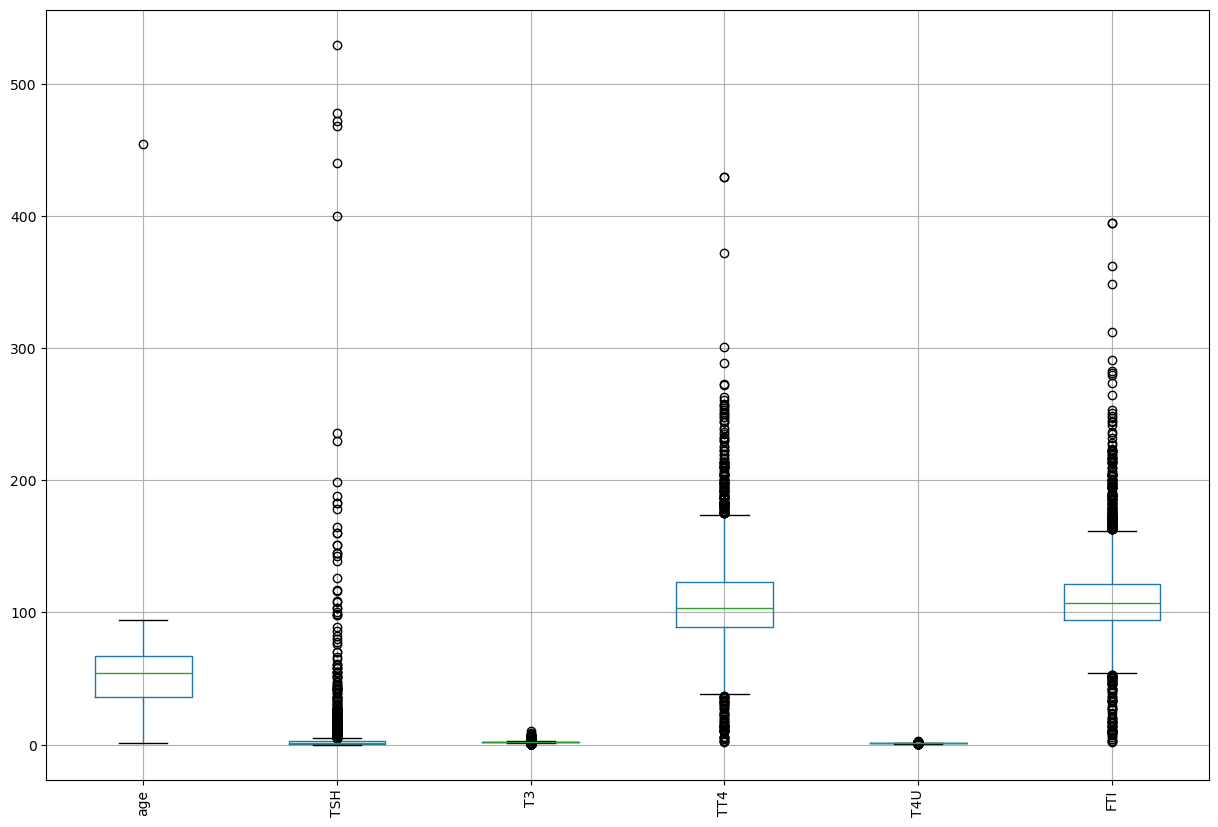

In [13]:
#outlier detection

plt.figure(figsize=(15,10))
df[numerical_columns].boxplot()
plt.xticks(rotation=90)
plt.show()

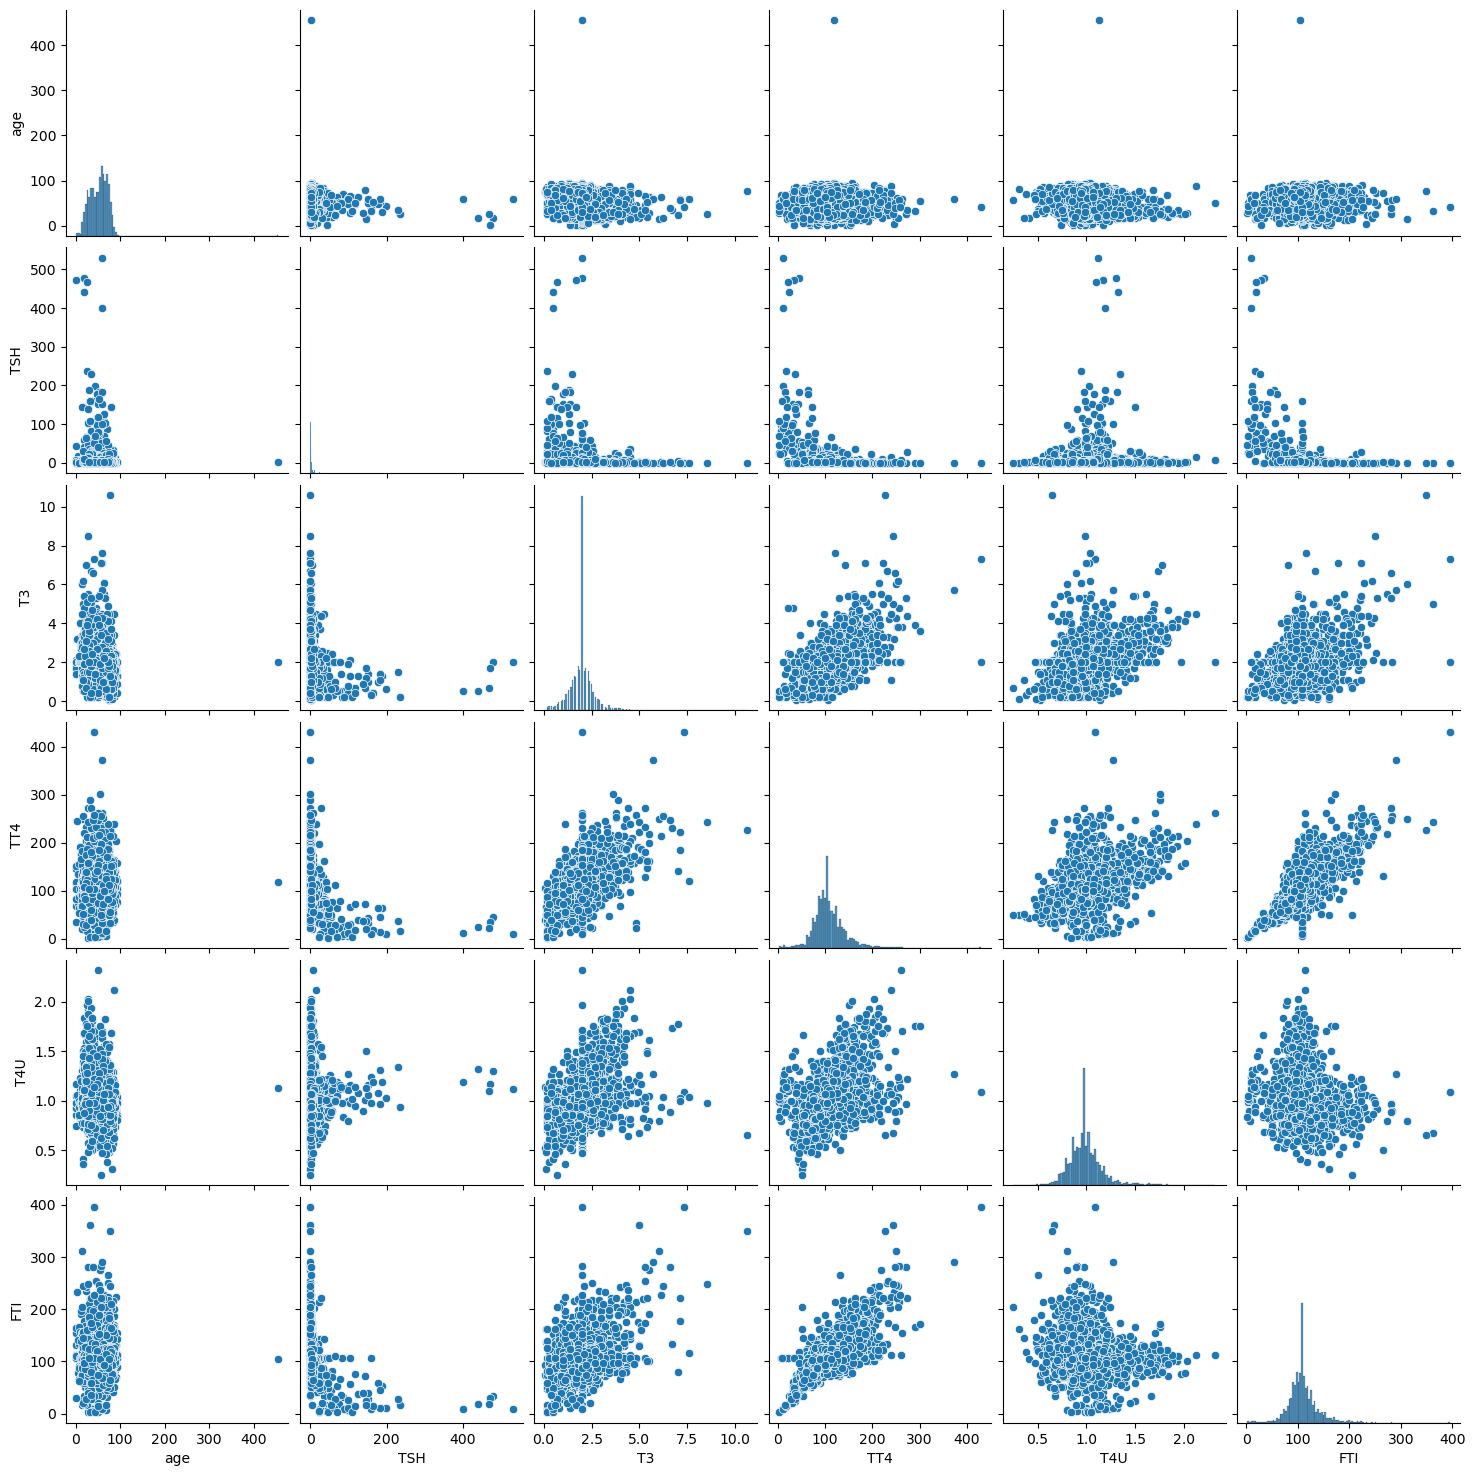

In [14]:
sns.pairplot(df)

Observations and Insights:

Several columns show significant outliers, which need further investigation and processing.

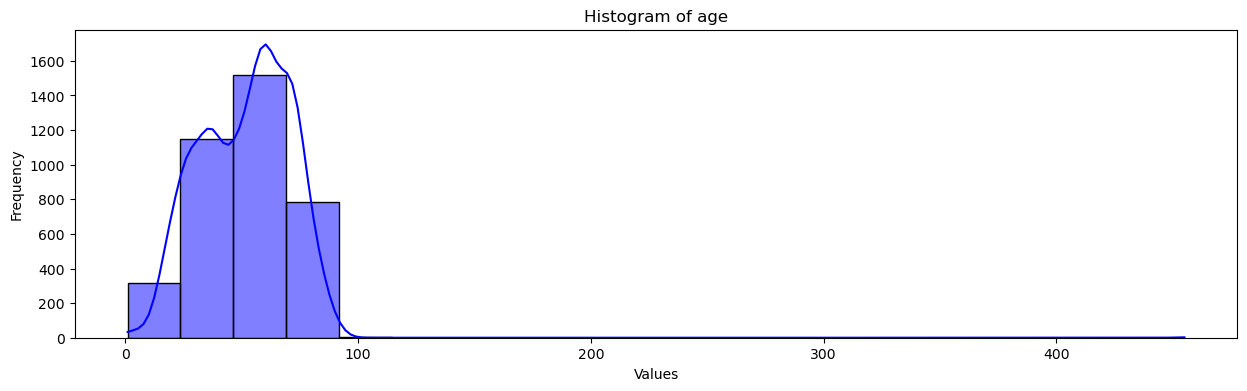

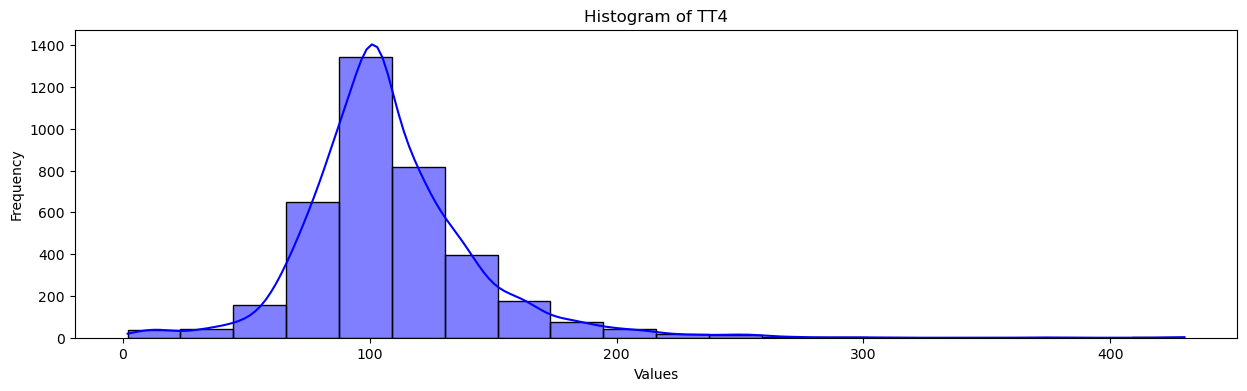

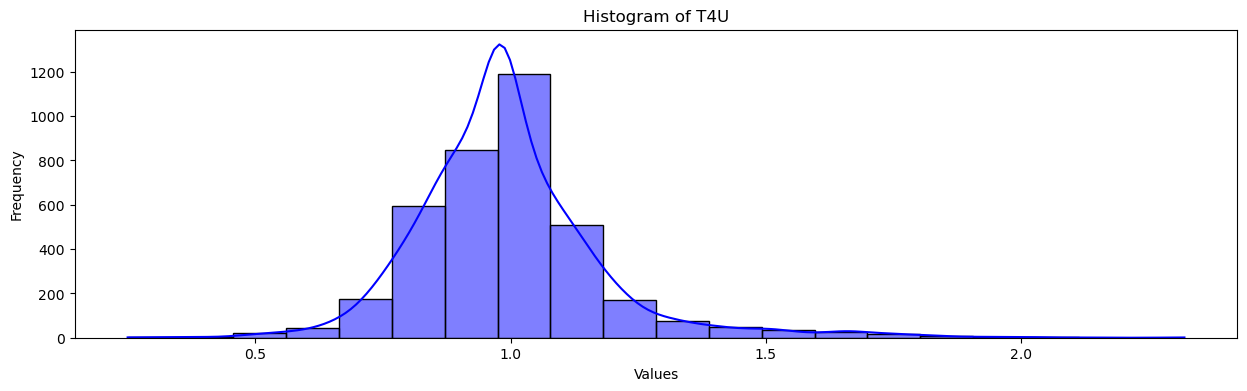

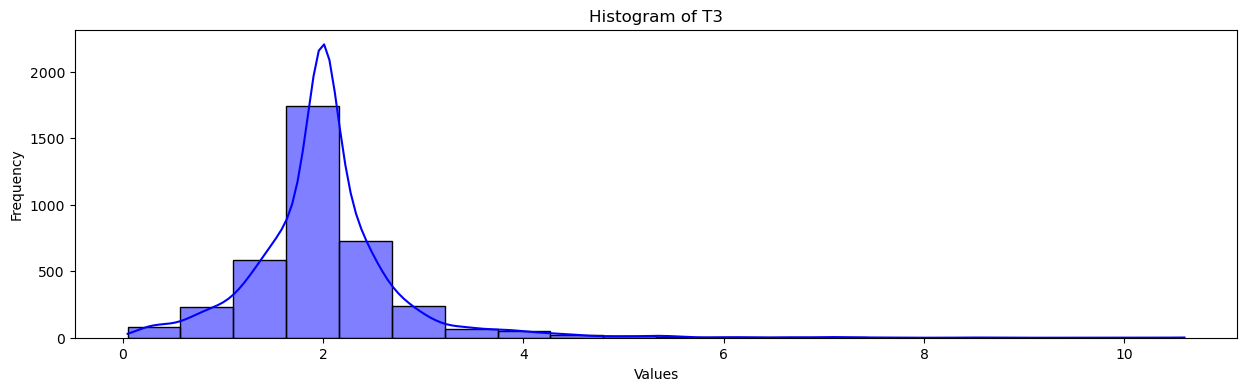

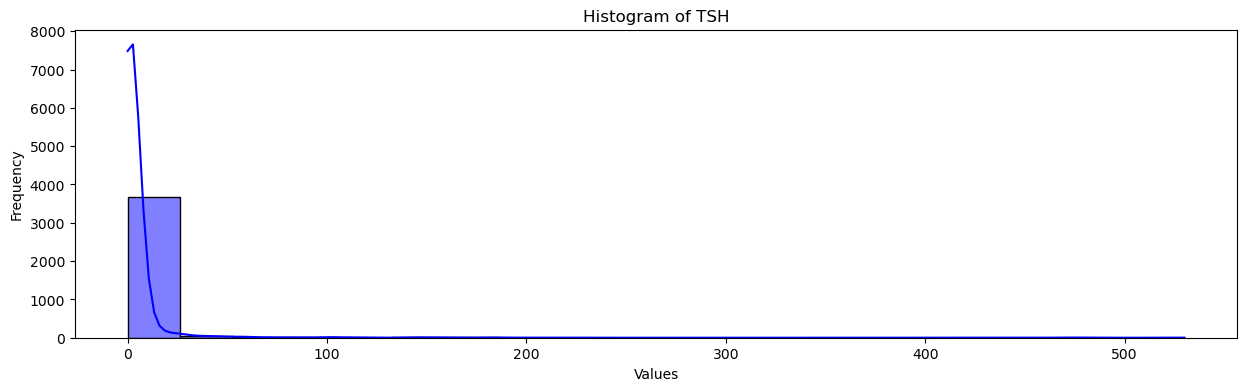

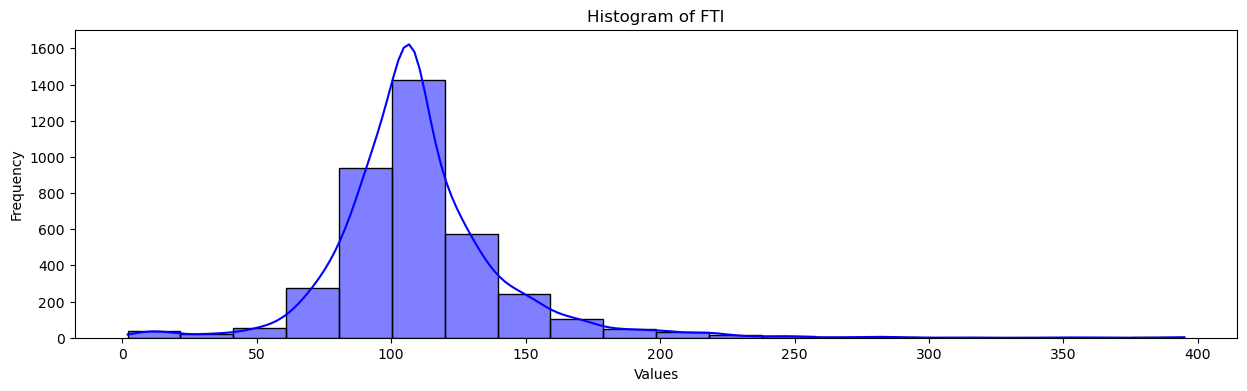

In [15]:
#check if the data is normally distributed to use IQR method for outlier removal
import matplotlib.pyplot as plt
import seaborn as sns

#Plot histograms and density plots for numeric columns
numeric_columns=['age','TT4','T4U','T3','TSH','FTI']
for col in numeric_columns:
    plt.figure(figsize=(15,4))
    sns.histplot(df[col], bins=20, kde=True, color='blue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

Observations and Insights:

Age:The histogram shows a slightly right-skewed distribution. This suggests that the age data is not normally distributed, with more values on the lower end.

TT4:The histogram displays a skewed distribution with a noticeable peak and a tail towards higher values, indicating non-normality.

T4U:This variable's distribution appears slightly skewed but closer to normal compared to other variables. However, it still deviates from a perfect normal distribution.

T3:The histogram for T3 shows a right-skewed distribution, indicating non-normality.

TSH:The TSH data is significantly right-skewed, deviating strongly from normality.

FTI:The distribution of FTI shows a slight skew but is closer to normal compared to others. It still does not meet the criteria for normality.

**None of the numerical columns exhibit a normal distribution based on the histograms and density plots. Most variables show skewness, either to the right or left, indicating that the data does not follow a normal distribution.Since the data is not normally distributed, using the IQR method for outlier detection may not be entirely appropriate for all columns


In [16]:
#Let us try removing outliers using iqr method

#Function to convert columns to appropriate data types and handle missing values
def preprocess_data(df):
    for col in numeric_columns:
        Q1= df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR= Q3 - Q1
        lower_bound= Q1- 1.5*IQR
        upper_bound=Q3+ 1.5*IQR
        df= df[(df[col]>=lower_bound) & (df[col] <= upper_bound)]

    return df

#Apply preprocessing function
df_processed= preprocess_data(df)

#Display processed Dataframe
print("Processed DataFrame:")
print(df_processed)


Processed DataFrame:
       age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0     41.0   F            f                  f                         f    f   
1     23.0   F            f                  f                         f    f   
2     46.0   M            f                  f                         f    f   
4     70.0   F            f                  f                         f    f   
6     59.0   F            f                  f                         f    f   
...    ...  ..          ...                ...                       ...  ...   
3764  54.0   M            f                  f                         f    f   
3767  30.0   F            f                  f                         f    f   
3768  68.0   F            f                  f                         f    f   
3770  72.0   M            f                  f                         f    f   
3771  64.0   F            f                  f                         f    f   

     p

Observations and Insights:

We can observe that if we use IQR method, a lot of data is getting removed. Therefore, it is proved that using IQR method is not an ideal method.

Outlier Percentages: 

age_Z-score: 0.03%
age_DBSCAN: 0.13%
TT4_Z-score: 1.41%
TT4_DBSCAN: 1.41%
T4U_Z-score: 2.04%
T4U_DBSCAN: 0.00%
T3_Z-score: 1.43%
T3_DBSCAN: 0.05%
TSH_Z-score: 1.03%
TSH_DBSCAN: 1.09%
FTI_Z-score: 2.09%
FTI_DBSCAN: 1.59%

Best Methods for Each Column: 

age: age_DBSCAN
TT4: TT4_Z-score
T4U: T4U_Z-score
T3: T3_Z-score
TSH: TSH_DBSCAN
FTI: FTI_Z-score


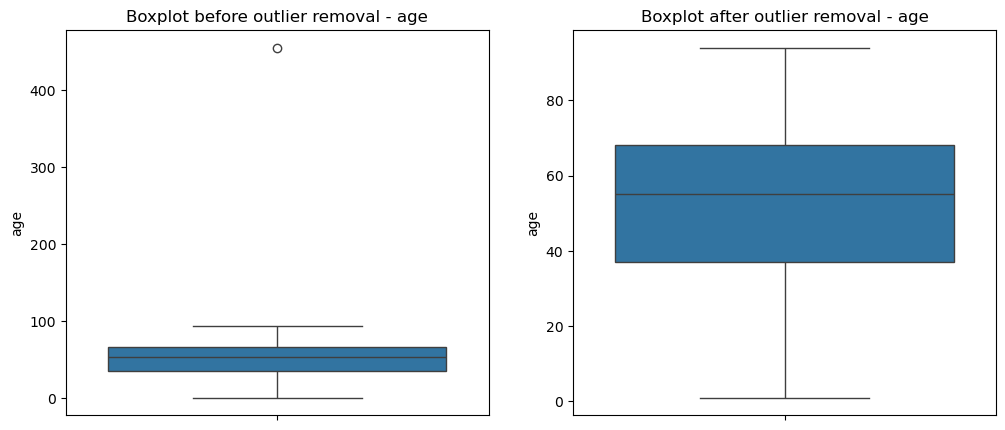

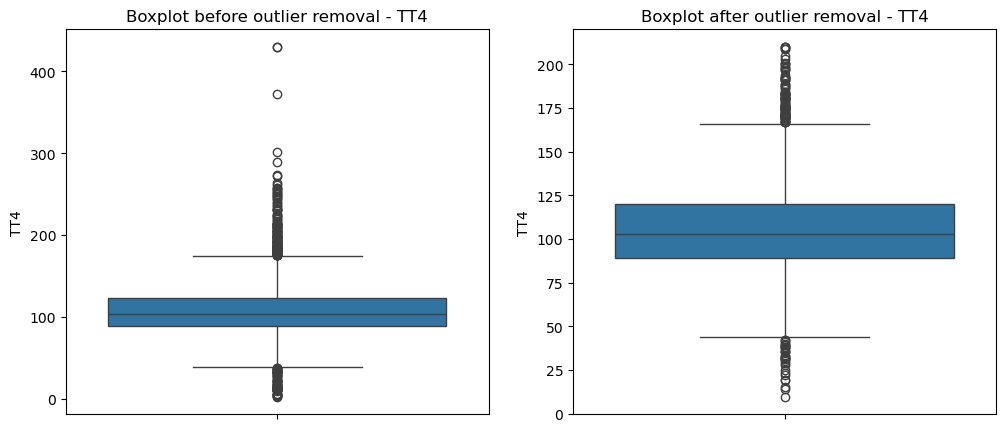

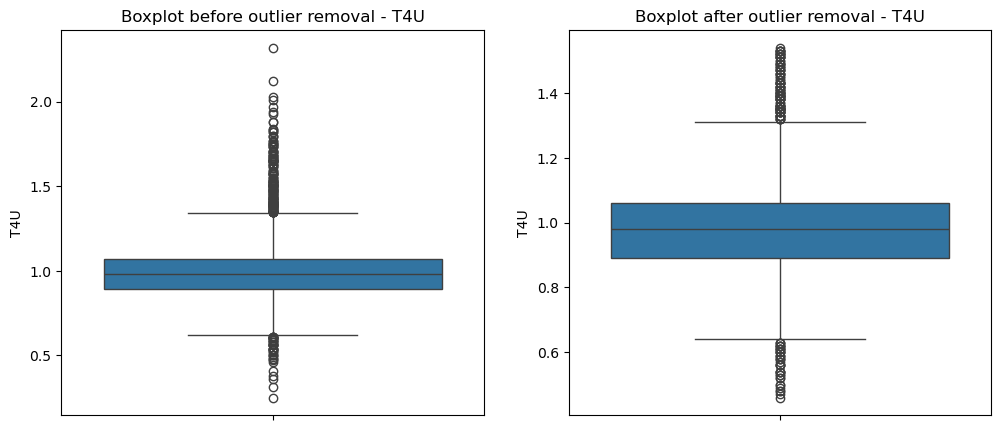

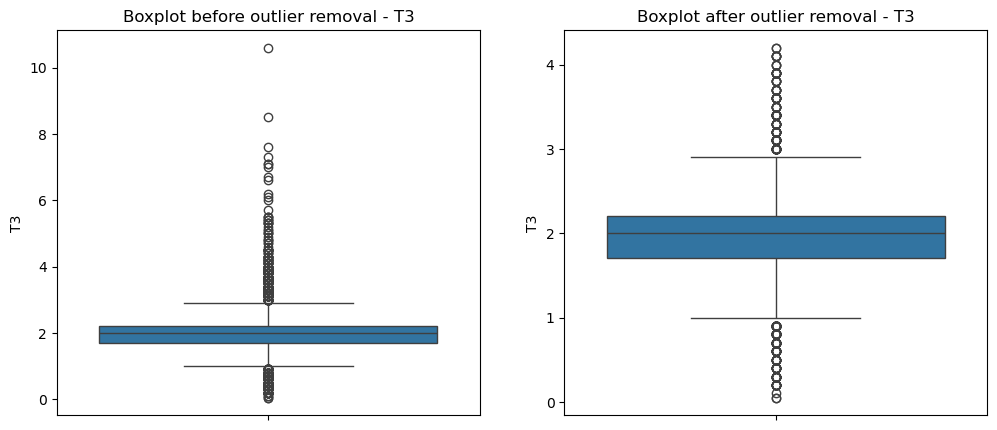

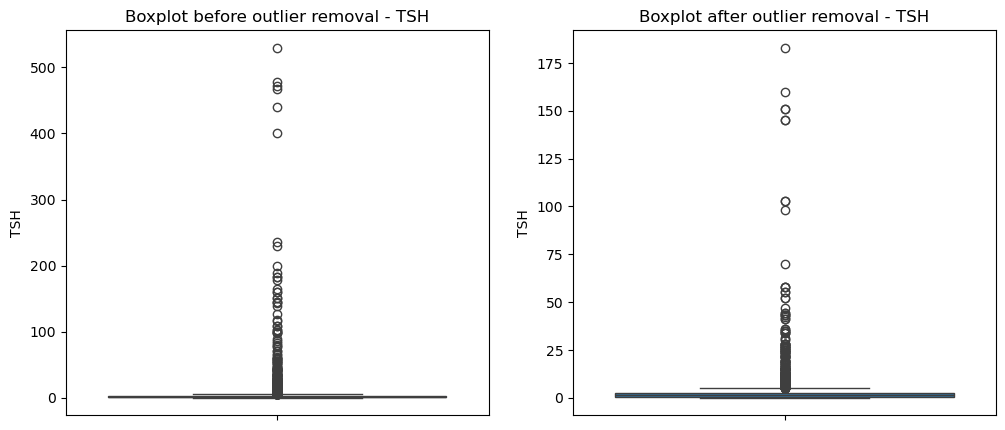

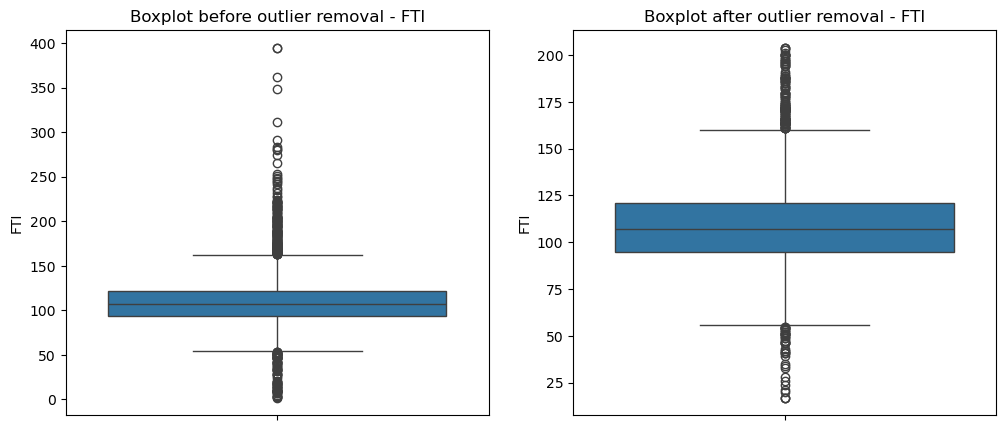

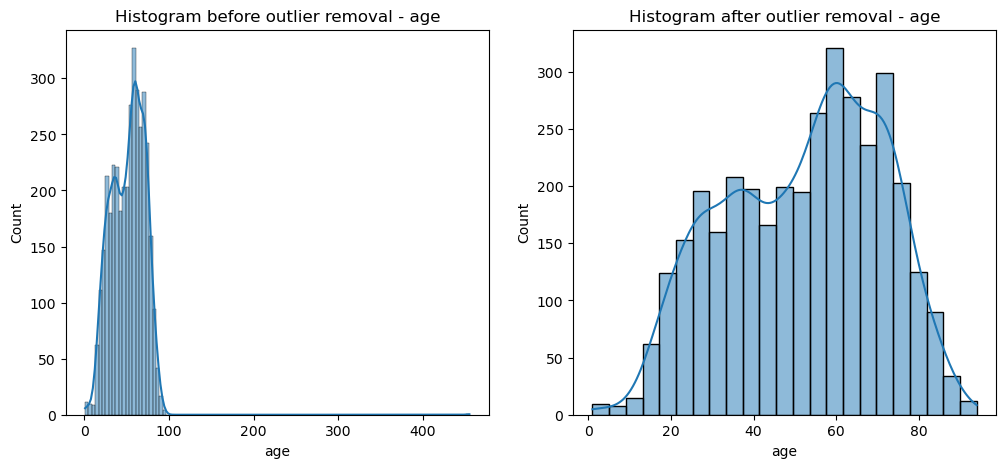

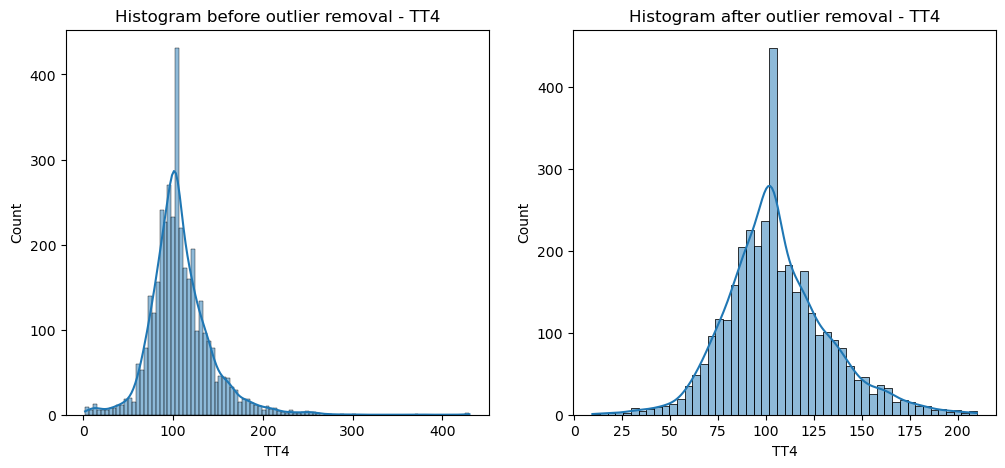

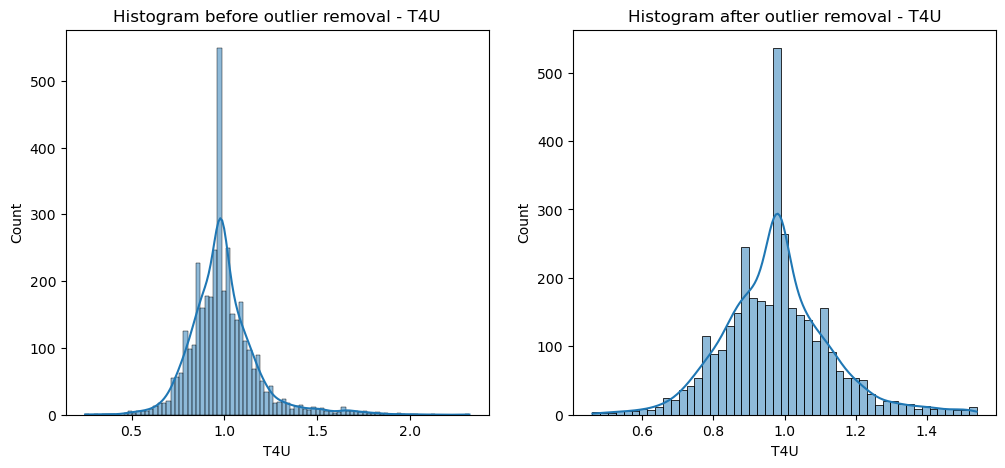

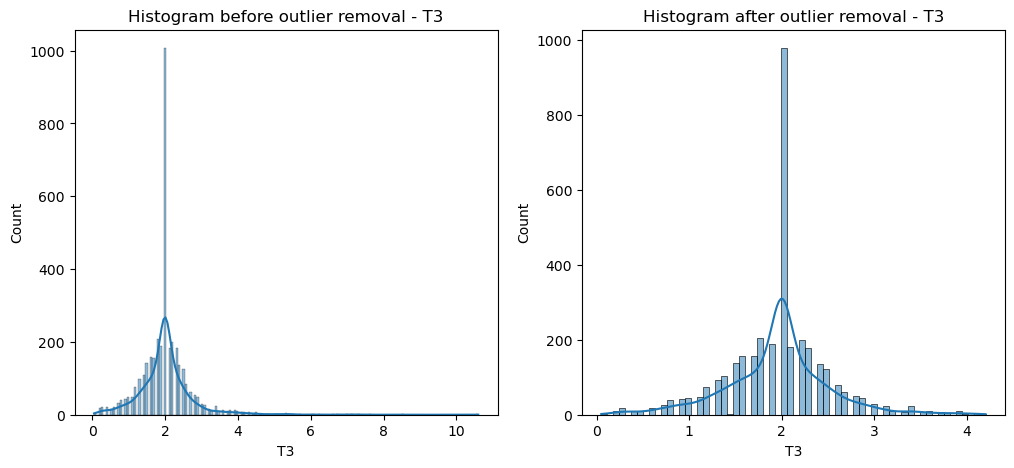

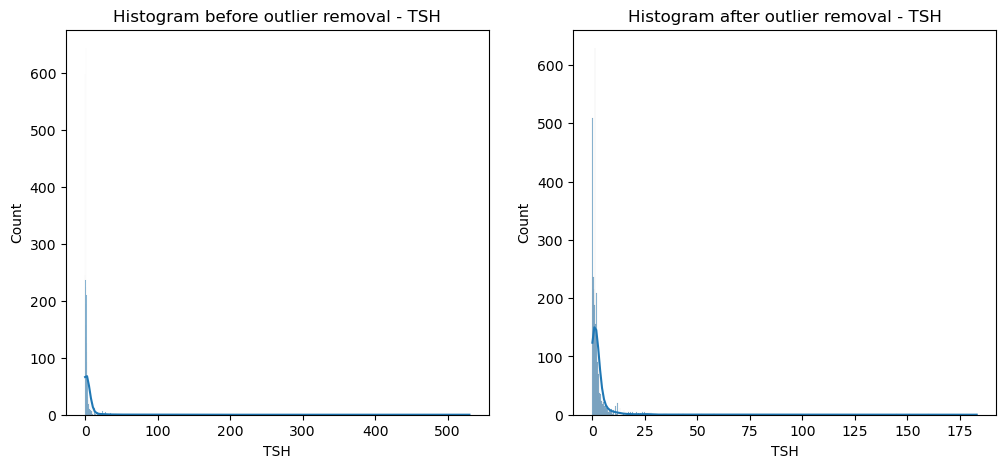

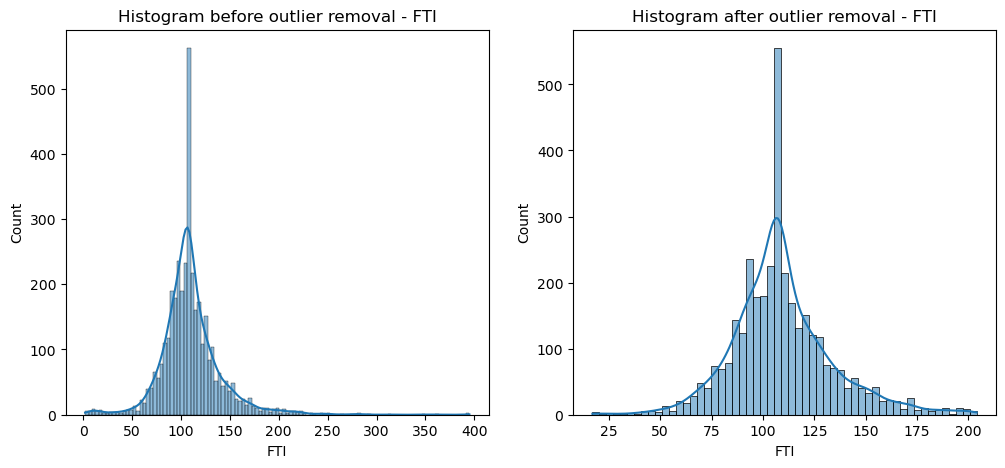


Descriptive Statistics Before Outlier Removal:
                age          TT4          T4U           T3          TSH  \
count  3772.000000  3772.000000  3772.000000  3772.000000  3772.000000   
mean     51.736479   107.993584     0.993461     2.010748     4.726104   
std      20.082329    34.520088     0.185212     0.738282    23.316598   
min       1.000000     2.000000     0.250000     0.050000     0.005000   
25%      36.000000    89.000000     0.890000     1.700000     0.600000   
50%      54.000000   103.000000     0.980000     2.000000     1.400000   
75%      67.000000   123.000000     1.070000     2.200000     2.425000   
max     455.000000   430.000000     2.320000    10.600000   530.000000   

               FTI  
count  3772.000000  
mean    110.115509  
std      31.372681  
min       2.000000  
25%      94.000000  
50%     107.000000  
75%     121.250000  
max     395.000000  

Descriptive Statistics After Outlier Removal:
                age          TT4          T4U   

In [18]:
from scipy import stats
from sklearn.cluster import DBSCAN

# Function to convert columns to appropriate data types and handle missing values and outliers
def preprocessed_data(df):
    
    # Dictionary to store outlier percentages
    outlier_percentages = {}
    
    # Handle outliers using multiple methods
    processed_dfs = {}
    
    for col in numeric_columns:
        # Method 1: Z-score method
        z_scores = np.abs(stats.zscore(df[col]))
        threshold = 3
        df_zscore = df[(z_scores <= threshold)]
        outlier_percentages[f'{col}_Z-score'] = (1 - len(df_zscore) / len(df)) * 100
        processed_dfs[f'{col}_Z-score'] = df_zscore
        
        # Method 2: DBSCAN method
        dbscan = DBSCAN(eps=0.5, min_samples=2)
        labels = dbscan.fit_predict(df[[col]].dropna().values.reshape(-1, 1))
        core_samples_mask = labels != -1
        df_dbscan = df[core_samples_mask]
        outlier_percentages[f'{col}_DBSCAN'] = (1 - len(df_dbscan) / len(df)) * 100
        processed_dfs[f'{col}_DBSCAN'] = df_dbscan

    # Print outlier percentages
    print("Outlier Percentages: \n")
    for method, percent in outlier_percentages.items():
        print(f"{method}: {percent:.2f}%")
    
    # Select the best method for each column
    best_methods = {}
    final_df = df.copy()
    for col in numeric_columns:
        methods = [ f'{col}_Z-score', f'{col}_DBSCAN']
        best_method = max(methods, key=lambda x: outlier_percentages[x])
        best_methods[col] = best_method
        final_df = final_df[final_df.index.isin(processed_dfs[best_method].index)]
    
    # Print the selected methods for each column
    print("\nBest Methods for Each Column: \n")
    for col, method in best_methods.items():
        print(f"{col}: {method}")
    
    return final_df

# Apply preprocessing function
df_processed = preprocessed_data(df)

# Visual Inspection
def plot_boxplots(df_before, df_after, numeric_columns):
    for col in numeric_columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.boxplot(data=df_before[col], ax=axes[0]).set_title(f'Boxplot before outlier removal - {col}')
        sns.boxplot(data=df_after[col], ax=axes[1]).set_title(f'Boxplot after outlier removal - {col}')
        plt.show()

def plot_histograms(df_before, df_after, numeric_columns):
    for col in numeric_columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.histplot(df_before[col], kde=True, ax=axes[0]).set_title(f'Histogram before outlier removal - {col}')
        sns.histplot(df_after[col], kde=True, ax=axes[1]).set_title(f'Histogram after outlier removal - {col}')
        plt.show()

numeric_columns = ['age', 'TT4', 'T4U', 'T3', 'TSH', 'FTI']
plot_boxplots(df, df_processed, numeric_columns)
plot_histograms(df, df_processed, numeric_columns)

# Descriptive Statistics
def descriptive_statistics(df_before, df_after, numeric_columns):
    before_stats = df_before[numeric_columns].describe()
    after_stats = df_after[numeric_columns].describe()
    return before_stats, after_stats

before_stats, after_stats = descriptive_statistics(df, df_processed, numeric_columns)
print("\nDescriptive Statistics Before Outlier Removal:\n", before_stats)
print("\nDescriptive Statistics After Outlier Removal:\n", after_stats)


# Display processed DataFrame
print("\nProcessed DataFrame: \n")
print(df_processed)


Observations and Insights:

Outlier Detection: Both Z-score and DBSCAN methods were effective in identifying outliers. The method detecting the highest percentage of outliers was used for each column.

Data Quality Improvement: Removing outliers using the selected methods improved the overall quality and consistency of the dataset.

Visual and Statistical Analysis: Boxplots and histograms confirmed the reduction in outliers and skewness. Descriptive statistics showed decreased variability and a more stable data range.

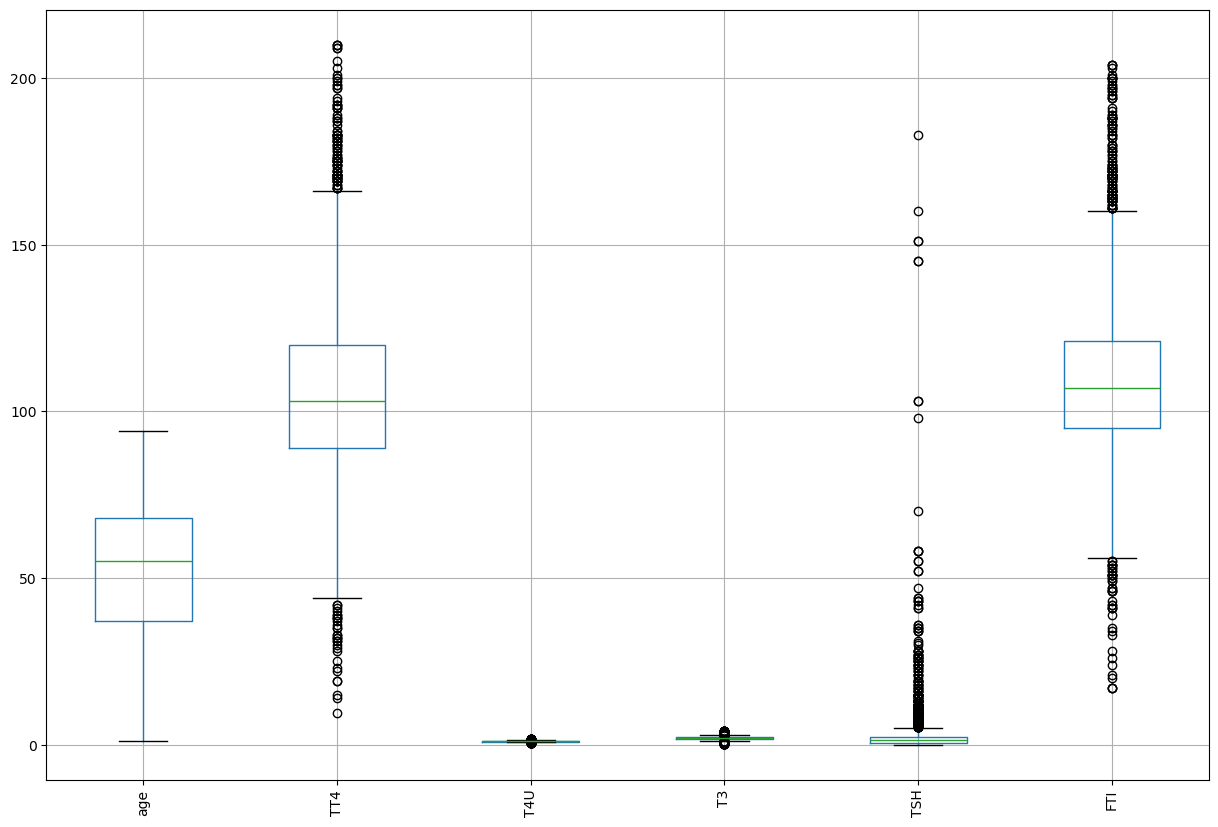

In [19]:
#visualizing if the outliers have been removed

plt.figure(figsize=(15,10))
df_processed[numeric_columns].boxplot()
plt.xticks(rotation=90)
plt.show()

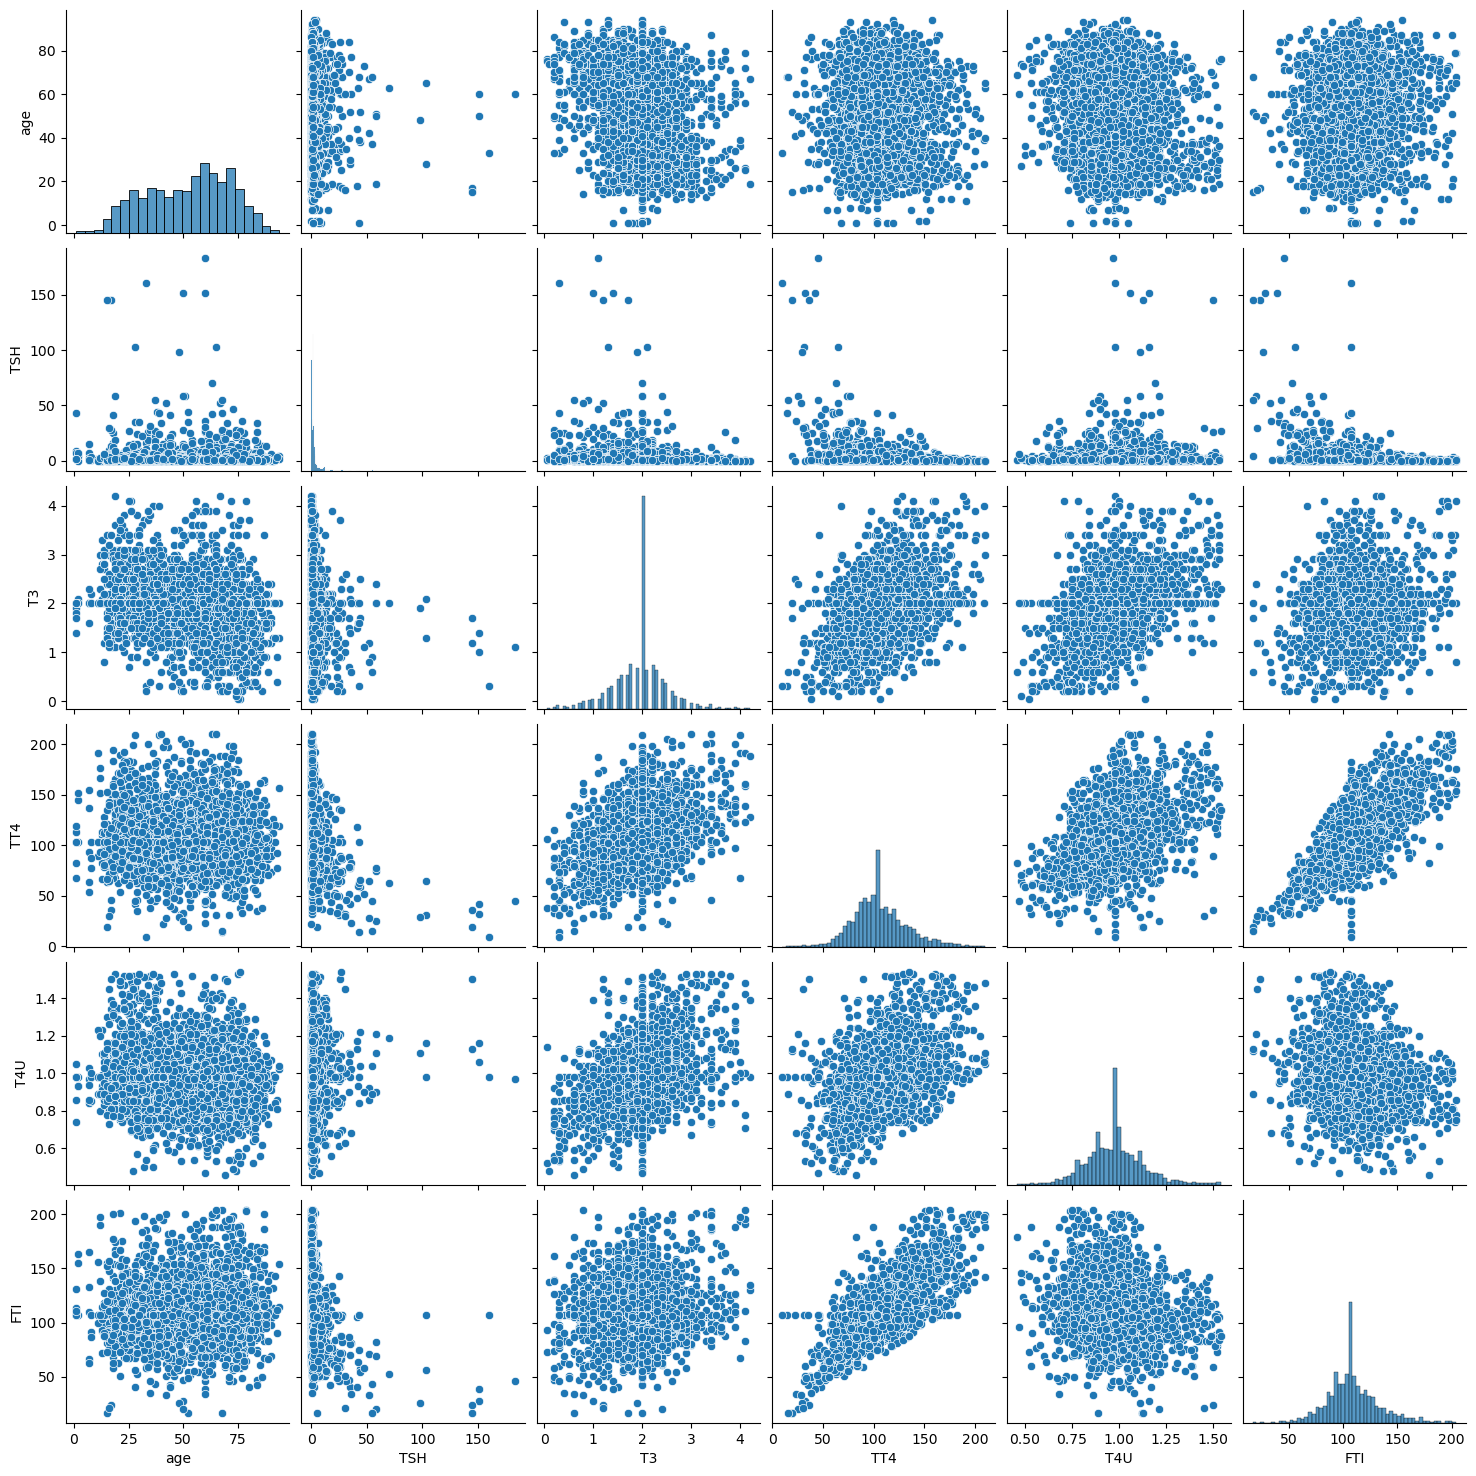

In [20]:
sns.pairplot(df_processed)

Observation and Insights:

The boxplots and pairplots for the processed DataFrame show significantly fewer or no outliers compared to the original DataFrame, indicating successful outlier removal.

# DATA PREPROCESSING

# Scaling and Transformation 

In [23]:
# Min-Max Scaling
def min_max_scaling(df, numeric_columns):
    scaled_df = df.copy()
    for col in numeric_columns:
        min_value = df[col].min()
        max_value = df[col].max()
        scaled_df[col] = (df[col] - min_value) / (max_value - min_value)
    return scaled_df

# Z-Score Standardization
def z_score_standardization(df, numeric_columns):
    scaled_df = df.copy()
    for col in numeric_columns:
        mean_value = df[col].mean()
        std_dev = df[col].std()
        scaled_df[col] = (df[col] - mean_value) / std_dev
    return scaled_df

# Select columns to be scaled
numeric_columns = ['age', 'TT4', 'T4U', 'T3', 'TSH', 'FTI']

# Apply Min-Max Scaling
df_min_max_scaled = min_max_scaling(df_processed, numeric_columns)

# Apply Z-Score Standardization
df_z_score_scaled = z_score_standardization(df_processed, numeric_columns)

# Display scaled DataFrames
print("\nMin-Max Scaled DataFrame: \n")
print(df_min_max_scaled.head())

print("\nZ-Score Standardized DataFrame: \n")
print(df_z_score_scaled.head())



Min-Max Scaled DataFrame: 

        age sex on thyroxine query on thyroxine on antithyroid medication  \
0  0.430108   F            f                  f                         f   
1  0.236559   F            f                  f                         f   
2  0.483871   M            f                  f                         f   
3  0.741935   F            t                  f                         f   
4  0.741935   F            f                  f                         f   

  sick pregnant thyroid surgery I131 treatment query hypothyroid  ...  \
0    f        f               f              f                 f  ...   
1    f        f               f              f                 f  ...   
2    f        f               f              f                 f  ...   
3    f        f               f              f                 f  ...   
4    f        f               f              f                 f  ...   

         T3 TT4 measured       TT4 T4U measured       T4U FTI measure

Pros of Min-max scaling:

Range Preservation: Keeps all values within the specified range i.e., [0,1].
Intuitive Interpretation: Scaled values are easier to interpret as percentages of the range.
Useful for Algorithms: Works well with algorithms that do not assume a normal distribution.

Therefore, Algorithms such as k-Nearest Neighbors (k-NN), Support Vector Machines (SVM) often perform better with Min-Max Scaling because these algorithms are sensitive to the magnitude of feature values. So, we can use min-max scaling for these algorithms.

Pros of z-score standardization:
Normalized Distribution: Centers the data around 0 and scales it to have a standard deviation of 1, which can be beneficial for many machine learning algorithms.
Less Sensitive to Outliers: Compared to Min-Max Scaling, it handles outliers better since it considers the spread of the data

Therefore, for algorithms like Logistic Regression and Naive Bayes, we can use z-score standardization, which assume normally distributed data.

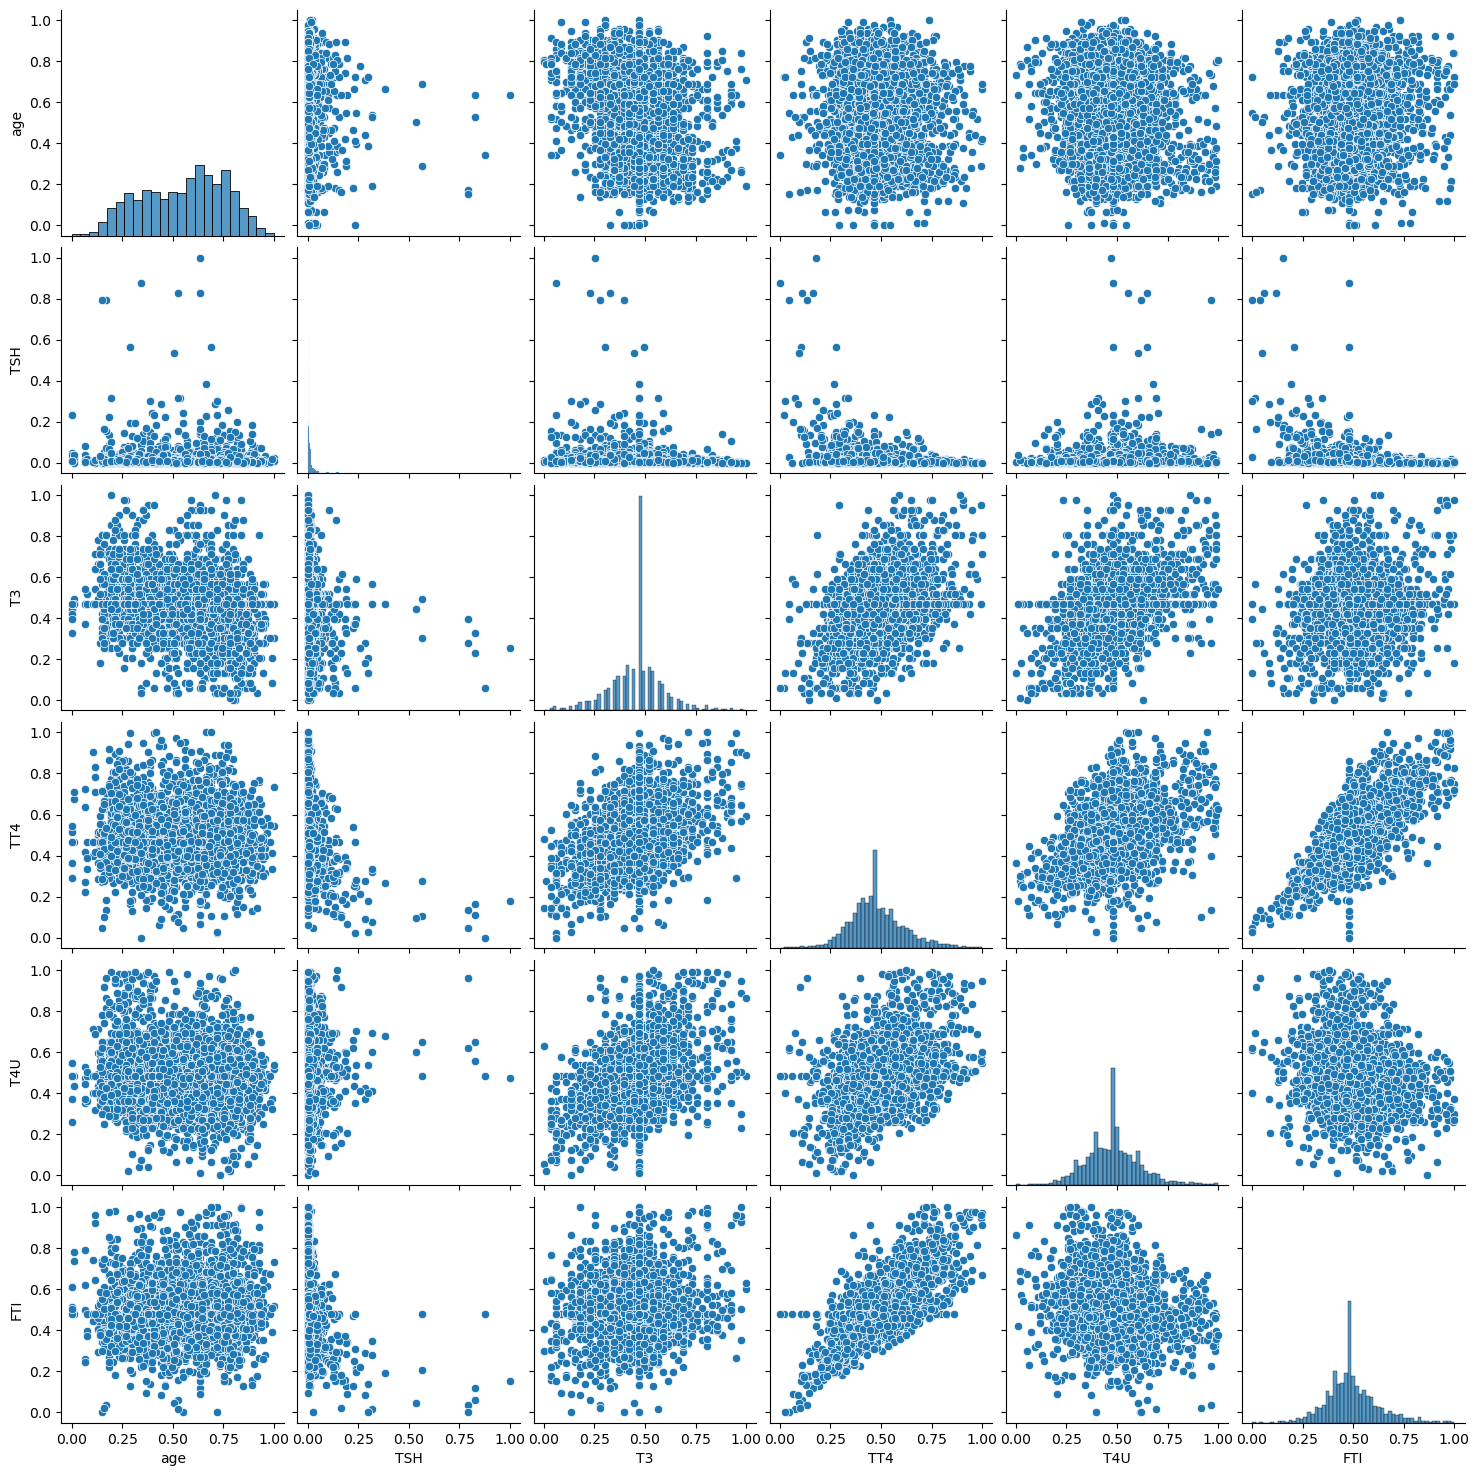

In [25]:
#check if the min_max_scaled data is also giving the same visualization plot, so that we know the data has been properly scaled
sns.pairplot(df_min_max_scaled)

In [26]:
def calculate_unique_categories(df, categorical_columns):
    unique_categories_count = df[categorical_columns].nunique()
    return unique_categories_count

# Get the number of unique categories for each categorical column
unique_categories_count = calculate_unique_categories(df_min_max_scaled, categorical_columns)

# Display the results
print("\nNumber of Unique Categories in Each Categorical Column:\n")
print(unique_categories_count)


Number of Unique Categories in Each Categorical Column:

sex                          2
on thyroxine                 2
query on thyroxine           2
on antithyroid medication    2
sick                         2
pregnant                     2
thyroid surgery              2
I131 treatment               2
query hypothyroid            2
query hyperthyroid           2
lithium                      2
goitre                       2
tumor                        2
hypopituitary                2
psych                        2
TSH measured                 2
T3 measured                  2
TT4 measured                 2
T4U measured                 2
FTI measured                 2
TBG measured                 1
referral source              5
binaryClass                  2
dtype: int64


Observations:

Since, there are more than 2 categories, in some of the predictors, we need to apply one hot encoding.

In [28]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Example categorical columns and target variable
target_variable = 'binaryClass'

# Separate features and target
X = df_min_max_scaled.drop(columns=[target_variable])
y = df_min_max_scaled[target_variable]

# Print column names for debugging
print("Available columns in X:", X.columns)
print("Categorical columns:", categorical_columns)

# Ensure that categorical_columns are in X
categorical_columns = [col for col in categorical_columns if col in X.columns]
print("Validated categorical columns:", categorical_columns)

# Apply one-hot encoding only to specified categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_categorical_encoded = encoder.fit_transform(X[categorical_columns])

# Convert encoded features back to a DataFrame
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded features with the remaining numeric features
X_remaining = X.drop(columns=categorical_columns)
X_remaining_df = X_remaining.reset_index(drop=True)
X_combined_df = pd.concat([X_remaining_df, X_categorical_encoded_df], axis=1)

# Combine with the target variable
result_df = pd.concat([X_combined_df, y.reset_index(drop=True)], axis=1)

print(result_df)


Available columns in X: Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'referral source'],
      dtype='object')
Categorical columns: ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'referral source', 'binaryClass']
Validated categorical columns: ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 

In [29]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Apply label encoding to the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert label encoded target variable back to DataFrame
y_encoded_df = pd.DataFrame(y_encoded, columns=[target_variable])

# Combine with the features DataFrame
result_df = pd.concat([X_combined_df, y_encoded_df.reset_index(drop=True)], axis=1)

print(result_df)

           age       TSH        T3       TT4       T4U       FTI  sex_M  \
0     0.430108  0.007077  0.590361  0.576060  0.629630  0.491979    0.0   
1     0.236559  0.022378  0.469880  0.461347  0.481481  0.481283    0.0   
2     0.483871  0.005328  0.469880  0.496259  0.416667  0.550802    1.0   
3     0.741935  0.000847  0.445783  0.825436  0.481481  0.481283    0.0   
4     0.741935  0.003907  0.277108  0.256858  0.379630  0.283422    0.0   
...        ...       ...       ...       ...       ...       ...    ...   
3550  0.311828  0.007623  0.469880  0.466334  0.481481  0.481283    0.0   
3551  0.720430  0.005437  0.493976  0.571072  0.574074  0.518717    0.0   
3552  0.784946  0.027842  0.421687  0.511222  0.564815  0.470588    0.0   
3553  0.763441  0.003798  0.469880  0.361596  0.444444  0.374332    1.0   
3554  0.677419  0.005437  0.518072  0.446384  0.564815  0.401070    0.0   

      on thyroxine_t  query on thyroxine_t  on antithyroid medication_t  ...  \
0                0.

In [30]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          3555 non-null   float64
 1   TSH                          3555 non-null   float64
 2   T3                           3555 non-null   float64
 3   TT4                          3555 non-null   float64
 4   T4U                          3555 non-null   float64
 5   FTI                          3555 non-null   float64
 6   sex_M                        3555 non-null   float64
 7   on thyroxine_t               3555 non-null   float64
 8   query on thyroxine_t         3555 non-null   float64
 9   on antithyroid medication_t  3555 non-null   float64
 10  sick_t                       3555 non-null   float64
 11  pregnant_t                   3555 non-null   float64
 12  thyroid surgery_t            3555 non-null   float64
 13  I131 treatment_t  

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=31 is greater than n_features=30. All the features will be returned.
  warnings.warn(


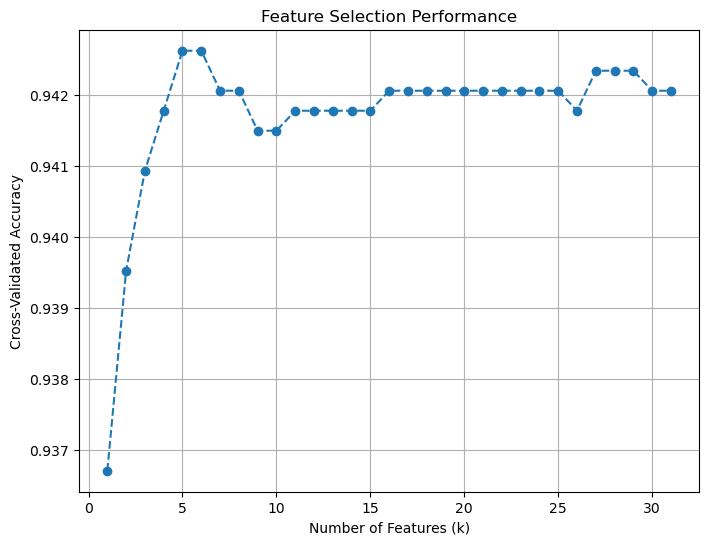

Best number of features (k): 5


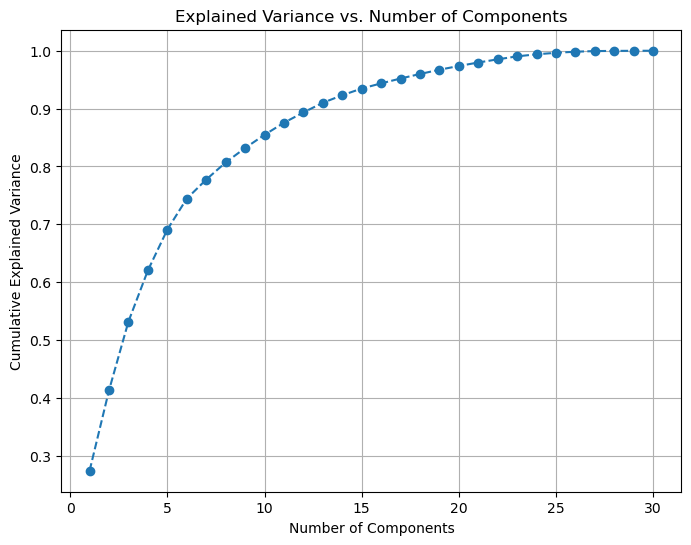

Number of components to retain 95.0% variance: 17
Selected Features DataFrame:
           TSH        T3       TT4       FTI  query hypothyroid_t  binaryClass
0     0.007077  0.590361  0.576060  0.491979                  0.0            1
1     0.022378  0.469880  0.461347  0.481283                  0.0            1
2     0.005328  0.469880  0.496259  0.550802                  0.0            1
3     0.000847  0.445783  0.825436  0.481283                  0.0            1
4     0.003907  0.277108  0.256858  0.283422                  0.0            1
...        ...       ...       ...       ...                  ...          ...
3550  0.007623  0.469880  0.466334  0.481283                  0.0            1
3551  0.005437  0.493976  0.571072  0.518717                  0.0            1
3552  0.027842  0.421687  0.511222  0.470588                  0.0            1
3553  0.003798  0.469880  0.361596  0.374332                  0.0            1
3554  0.005437  0.518072  0.446384  0.401070        

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Feature Selection with SelectKBest
k_values = range(1, result_df.shape[1] + 1)  # Testing from 1 to the number of features
cv_scores = []

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X_combined_df, y_encoded)
    scores = cross_val_score(LogisticRegression(), X_selected, y_encoded, cv=5)
    cv_scores.append(scores.mean())

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='--')
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Feature Selection Performance')
plt.grid(True)
plt.show()

# Find the best k
best_k = k_values[np.argmax(cv_scores)]
print(f"Best number of features (k): {best_k}")

# Apply SelectKBest with the best k
selector = SelectKBest(score_func=f_classif, k=best_k)
X_selected = selector.fit_transform(X_combined_df, y_encoded)
selected_features_mask = selector.get_support()
selected_feature_names = X_combined_df.columns[selected_features_mask]
selected_features_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# PCA for Feature Reduction
pca = PCA()
pca.fit(X_combined_df)

# Plot explained variance ratio to determine the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Choose the number of components that explain at least 95% of the variance
variance_threshold = 0.95
n_components = (cumulative_variance_ratio < variance_threshold).sum() + 1
print(f"Number of components to retain {variance_threshold*100}% variance: {n_components}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_combined_df)

# Convert PCA components back to DataFrame
pca_feature_names = [f'PC{i+1}' for i in range(n_components)]
pca_features_df = pd.DataFrame(X_reduced, columns=pca_feature_names)

# Combine with the target variable
result_df_pca = pd.concat([pca_features_df.reset_index(drop=True), y_encoded_df.reset_index(drop=True)], axis=1)

# Combine selected features with the target variable
result_df_selection = pd.concat([selected_features_df.reset_index(drop=True), y_encoded_df.reset_index(drop=True)], axis=1)

print("Selected Features DataFrame:")
print(result_df_selection)

print("PCA Reduced Features DataFrame:")
print(result_df_pca)


In [92]:
from sklearn.feature_selection import mutual_info_regression
# Calculate mutual information
mi = mutual_info_regression(X, y)

# Create a DataFrame for mutual information scores
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)

                        Feature  Mutual Information
1                           TSH            0.216197
5                           FTI            0.054612
3                           TT4            0.038824
14          query hypothyroid_t            0.027551
0                           age            0.026818
6                         sex_M            0.022611
17                     goitre_t            0.017542
25               FTI measured_t            0.017261
24               T4U measured_t            0.016761
26         referral source_SVHC            0.013953
19              hypopituitary_t            0.011309
22                T3 measured_t            0.007661
10                       sick_t            0.005595
27         referral source_SVHD            0.004731
18                      tumor_t            0.002604
8          query on thyroxine_t            0.001241
12            thyroid surgery_t            0.000519
21               TSH measured_t            0.000000
23          

Observations and Insights:

Features with zero MI scores contribute minimally to the model's predictive power. They may be considered for exclusion to simplify the model and reduce dimensionality.

# DATA SPLITTING

In [33]:
X = result_df.drop("binaryClass",axis=1)
y = result_df["binaryClass"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100)
len(X_train),len(X_test)

(2666, 889)

# MODEL SELECTION

# KNeighbors Classification

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math

k_start = int(math.sqrt(len(X_train))) # values of k has to be integers
print("Starting value of k is taken as",k_start)
metric_start = 'euclidean'

knn = KNeighborsClassifier(n_neighbors = k_start, metric = metric_start)

#fit the model
knn = knn.fit(X_train,y_train)

#predict using model
y_pred = knn.predict(X_test)

print("Model perforamce for starting value of k are obtained as below,\n")
print("Accuracy is",accuracy_score(y_test,y_pred))
print("Precision is",precision_score(y_test,y_pred))
print("Recall is",recall_score(y_test,y_pred))
print("F1-score is",f1_score(y_test,y_pred))

Starting value of k is taken as 51
Model perforamce for starting value of k are obtained as below,

Accuracy is 0.9437570303712036
Precision is 0.9437570303712036
Recall is 1.0
F1-score is 0.9710648148148148


Observations and Insights:

Model Performance with k=51:
Accuracy: 0.944
Precision: 0.944
Recall: 1.0
F1-Score: 0.971
These metrics indicate good performance, but further tuning is necessary to optimize the model.

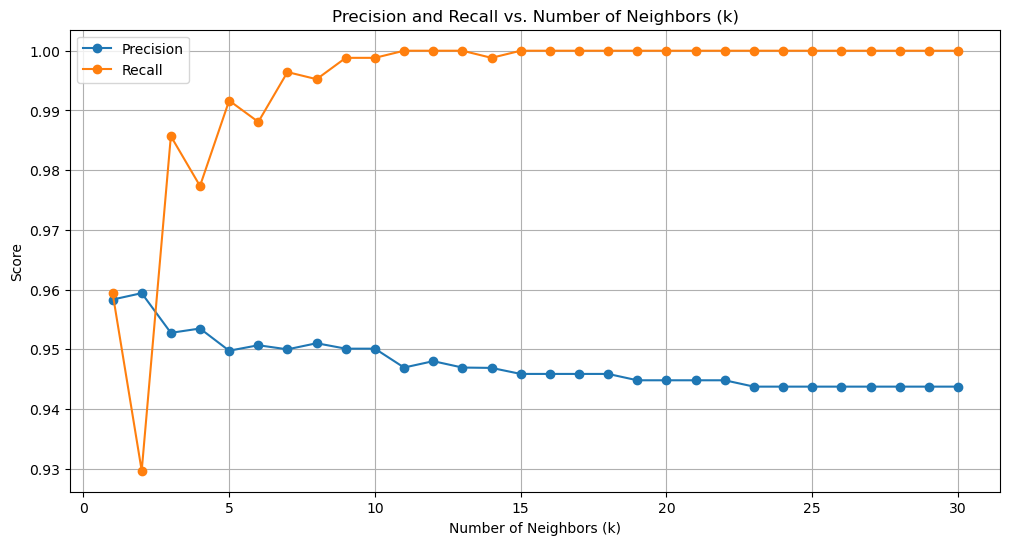

The best k value is 9 with an F1-score of  0.9739


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize Lists to store the scores
k_values = list(range(1, 31))
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through different k values
for k in k_values:
    # Initialize the KNeighborsClassifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate precision, recall, and f1 scores
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the scores to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot Precision and Recall vs. k values
plt.figure(figsize=(12, 6))
plt.plot(k_values, precision_scores, label='Precision', marker='o')
plt.plot(k_values, recall_scores, label='Recall', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Number of Neighbors (k)')
plt.legend()
plt.grid(True)
plt.show()


#Find the k for which F1-score is highest
best_k=k_values[np.argmax(f1_scores)]
best_f1= max(f1_scores)

print(f'The best k value is {best_k} with an F1-score of {best_f1: .4f}')

Observations and Insights:

Evaluation Across Different k Values:A range of k values from 1 to 30 was tested.
Best k Value: 9
Best F1-Score: 0.974
The best k value improves the model's F1-score compared to the initial k of 51, suggesting that a smaller k value better balances precision and recall.

Precision and Recall vs. k Values:
Precision and recall scores were plotted against different k values.

In [38]:

# Define the best k value
best_k = 9

# Define the distance metrics to evaluate
distance_metrics = ['euclidean', 'minkowski', 'cosine', 'hamming']

# Initialize lists to store metrics
metrics_results = []

# Loop through each distance metric
for metric in distance_metrics:
    # Initialize the KNeighborsClassifier with the current distance metric
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append the results
    metrics_results.append([metric, precision, recall, accuracy, f1])

# Convert results to DataFrame
metrics_df = pd.DataFrame(metrics_results, columns=['Distance Metric', 'Precision', 'Recall', 'Accuracy', 'F1-Score'])

# Display the results
print(metrics_df)

# Identify the best distance metric based on F1-Score
best_metric = metrics_df.loc[metrics_df['F1-Score'].idxmax()]
print("\nBest Metric based on F1-Score:")
print(best_metric)


  Distance Metric  Precision    Recall  Accuracy  F1-Score
0       euclidean   0.950113  0.998808  0.949381  0.973852
1       minkowski   0.950113  0.998808  0.949381  0.973852
2          cosine   0.950170  1.000000  0.950506  0.974448
3         hamming   0.944820  1.000000  0.944882  0.971627

Best Metric based on F1-Score:
Distance Metric      cosine
Precision           0.95017
Recall                  1.0
Accuracy           0.950506
F1-Score           0.974448
Name: 2, dtype: object


Observations and Insights:

The Cosine distance metric achieved the highest F1-score, indicating it is the most effective metric for this problem.Hence,
Best k Value: 9
Best Distance Metric: Cosine


# SVM

In [40]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

kernel_values = ['linear','poly','rbf','sigmoid']

svm_clf = svm.SVC(kernel=kernel_values[0], C =1, gamma = 0.1)

# train SVC on X_train
svm_clf = svm_clf.fit(X_train, y_train)

# predict the response using SVM fitted model
y_pred = svm_clf.predict(X_test)

print("Model Performance metrics are as below :-\n")
print("Accuracy is "+str(accuracy_score(y_test,y_pred)))
print("Precision is "+str(precision_score(y_test,y_pred)))
print("Recall is "+str(recall_score(y_test,y_pred)))
print("F1-Score is "+str(f1_score(y_test,y_pred)))

Model Performance metrics are as below :-

Accuracy is 0.9550056242969629
Precision is 0.9544937428896473
Recall is 1.0
F1-Score is 0.9767171129220024


Observations and Insights:

When we considered,
Kernel: Linear
C: 1
Gamma: 0.1

Model Performance Metrics:
Accuracy: 0.955
Precision: 0.954
Recall: 1.000
F1-Score: 0.977
The SVM model with a linear kernel, demonstrates strong performance, particularly with a high F1-Score indicating a good balance between precision and recall.

In [41]:
C_values = [0.01, 0.1, 1, 1.5, 5, 10]
gamma_values = [0.1, 1/len(X.columns)]
kernel_values = ['linear','poly','rbf','sigmoid']

PerfMatrix = []

for k in kernel_values:
    for c in C_values:
        for g in gamma_values:

            svm_clf = svm.SVC(kernel=k, C =c, gamma = g)
            svm_clf = svm_clf.fit(X_train,y_train)
            y_pred = svm_clf.predict(X_test)
            row  = [k,c,g,accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)]
            PerfMatrix.append(row)

PerfMatrix = pd.DataFrame(PerfMatrix,columns=['Kernel Type','C','Gamma','Accuracy','Precision','Recall','F1-Score'])
PerfMatrix.head()

,Kernel Type,C,Gamma,Accuracy,Precision,Recall,F1-Score
0,linear,0.01,0.100000,0.943757,0.943757,1.0,0.971065
1,linear,0.01,0.033333,0.943757,0.943757,1.0,0.971065
2,linear,0.10,0.100000,0.943757,0.943757,1.0,0.971065
3,linear,0.10,0.033333,0.943757,0.943757,1.0,0.971065
4,linear,1.00,0.100000,0.955006,0.954494,1.0,0.976717


In [42]:
PerfMatrix[PerfMatrix['F1-Score']==max(PerfMatrix['F1-Score'])]

,Kernel Type,C,Gamma,Accuracy,Precision,Recall,F1-Score
10,linear,10.0,0.100000,0.977503,0.976717,1.0,0.988221
11,linear,10.0,0.033333,0.977503,0.976717,1.0,0.988221


Observations and Insights:

The best-performing model configuration has achieved the highest F1-Score and accuracy, indicating optimal performance with a linear kernel, 
C=0.1,γ=0.1.

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Predict using the fitted model
y_pred = dt.predict(X_test)

# Print model performance metrics
print("Model Performance metrics are as below:-\n")
print("Accuracy is " + str(accuracy_score(y_test, y_pred)))
print("Precision is " + str(precision_score(y_test, y_pred, average='macro')))
print("Recall is " + str(recall_score(y_test, y_pred, average='macro')))
print("F1-Score is " + str(f1_score(y_test, y_pred, average='macro')))


Model Performance metrics are as below:-

Accuracy is 0.9943757030371203
Precision is 0.9693949178716832
Recall is 0.978212157330155
F1-Score is 0.9737567674477645


Criterion          entropy
Max Depth               11
Max Leaf Nodes           5
Precision         0.977806
Recall            0.968808
F1-Score          0.973258
balance           0.045455
Name: 3, dtype: object

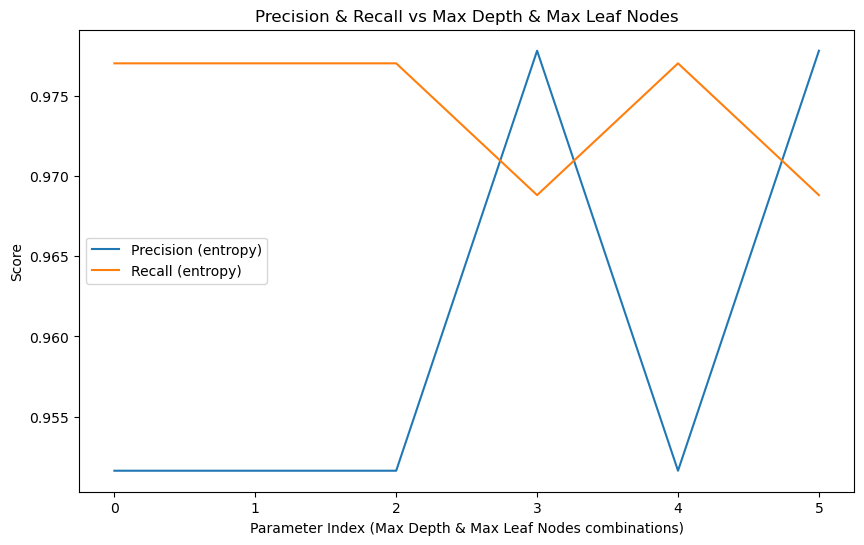

Best parameters: Criterion=entropy, Max Depth=11, Max Leaf Nodes=5
Highest F1-Score: 0.9732584932108458


In [44]:
# Define the parameters
criterion = ['entropy']
max_depth = np.arange(1, 15).tolist()[0::2]
max_leaf_nodes = np.arange(3, 26).tolist()[0::2]

# Initialize an empty list to hold the performance data
PerfData = []

# Iterate over all combinations of criterion, max depth, and max leaf nodes
for c in criterion:
    for d in max_depth:
        for l in max_leaf_nodes:
            if d // 5 <= l <= d // 2:
                dt = DecisionTreeClassifier(criterion=c, max_depth=d, max_leaf_nodes=l, random_state=42)
                dt.fit(X_train, y_train)
                y_pred = dt.predict(X_test)

                row = [c, d, l, precision_score(y_test, y_pred, average='macro'), 
                       recall_score(y_test, y_pred, average='macro'), 
                       f1_score(y_test, y_pred, average='macro')]
                PerfData.append(row)

# Convert the performance data into a DataFrame
PerfData = pd.DataFrame(PerfData, columns=['Criterion', 'Max Depth', 'Max Leaf Nodes', 'Precision', 'Recall', 'F1-Score'])

# Find the highest F1-Score
max_f1_score = PerfData['F1-Score'].max()

# Filter out the rows with the highest F1-Score
best_params = PerfData[PerfData['F1-Score'] == max_f1_score].copy()

# Further filter the best parameters based on the most balanced ratio
best_params.loc[:, 'balance'] = abs(best_params['Max Leaf Nodes'] / best_params["Max Depth"] - 0.5)
best_params = best_params.sort_values(by='balance').iloc[0]

# Display the best parameters
display(best_params)

# Plot Precision & Recall vs Parameters
plt.figure(figsize=(10, 6))

for crit in PerfData['Criterion'].unique():
    subset = PerfData[PerfData['Criterion'] == crit]
    plt.plot(subset.index, subset["Precision"], label=f'Precision ({crit})')
    plt.plot(subset.index, subset["Recall"], label=f'Recall ({crit})')

plt.xlabel("Parameter Index (Max Depth & Max Leaf Nodes combinations)")
plt.ylabel('Score')
plt.title('Precision & Recall vs Max Depth & Max Leaf Nodes')
plt.legend()
plt.show()

# Print the best parameters
print(f"Best parameters: Criterion={best_params['Criterion']}, Max Depth={best_params['Max Depth']}, Max Leaf Nodes={best_params['Max Leaf Nodes']}")
print(f"Highest F1-Score: {best_params['F1-Score']}")


In [45]:
# Initialize the DecisionTreeClassifier with the best parameters
dt_new = DecisionTreeClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=5, random_state=42)

# Fit the model
dt_new.fit(X_train, y_train)

# Predict using the fitted model
y_pred = dt_new.predict(X_test)

# Print final model performance metrics
print("Final Model Performance metrics are as below:-\n")
print("Accuracy is " + str(accuracy_score(y_test, y_pred)))
print("Precision is " + str(precision_score(y_test, y_pred, average='macro')))
print("Recall is " + str(recall_score(y_test, y_pred, average='macro')))
print("F1-Score is " + str(f1_score(y_test, y_pred, average='macro')))


Final Model Performance metrics are as below:-

Accuracy is 0.9943757030371203
Precision is 0.9778061224489796
Recall is 0.9688081048867699
F1-Score is 0.9732584932108458


Observations and Insights:

1.**Initial Model Performan**- **Accury**: 95.-- **Precion**: 95- - **Rall**: -  - **F1core**: %

   The SVM model with a linear rnel, \C = 1  and \( \gamm 0.1 \) delivered excellent performance, achieving high accuracy, precision, and a perfect re2. 

2. **Hyperparamer -*:
   - **Bt k -B 9
   - **Best Disnce Metri Cosine

   The F1-Score was maximized with the cosine distance metric, indicating the most balanced performance across precision3.recall.

3. **Final Hyperparate-ation*
   - **-*Linea- **C* 10
 **Gamma**: 0.1

   With these parameters, the model achieved an F1-Score of 98.8%, demonstrating exceptional overall performance and inatg that a high \( C \) value and cosine distance metric are effective for this dataset.

Overall, the SVM model performed admirably, particularly with the linear kernel and optimized parameters, providing a robust classifier with high precision and recall.


# Bagging


In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the BaggingClassifier with 50 estimators
bc = BaggingClassifier(n_estimators=50, random_state=42)

# Fit the model
bc.fit(X_train, y_train)

# Predict using the fitted model
y_pred_bc = bc.predict(X_test)

# Print model performance metrics
print("F1-Score of Bagging Classifier with 50 estimators is {}".format(f1_score(y_test, y_pred_bc, average='macro')))
print("Accuracy of Bagging Classifier with 50 estimators is {}".format(accuracy_score(y_test, y_pred_bc)))
print("Precision of Bagging Classifier with 50 estimators is {}".format(precision_score(y_test, y_pred_bc, average='macro')))
print("Recall of Bagging Classifier with 50 estimators is {}".format(recall_score(y_test, y_pred_bc, average='macro')))


F1-Score of Bagging Classifier with 50 estimators is 0.9737567674477645
Accuracy of Bagging Classifier with 50 estimators is 0.9943757030371203
Precision of Bagging Classifier with 50 estimators is 0.9693949178716832
Recall of Bagging Classifier with 50 estimators is 0.978212157330155


,No. of estimators,Precision,Recall,F1-Score,Accuracy
0,2,0.914652,0.984041,0.946246,0.987627
1,3,0.951634,0.977020,0.963930,0.992126
2,4,0.929224,0.985232,0.955251,0.989876
3,5,0.951634,0.977020,0.963930,0.992126
4,6,0.951634,0.977020,0.963930,0.992126
5,7,0.960344,0.977616,0.968798,0.993251
6,8,0.961666,0.987616,0.974236,0.994376
7,9,0.960344,0.977616,0.968798,0.993251
8,10,0.961666,0.987616,0.974236,0.994376
9,11,0.969395,0.978212,0.973757,0.994376


,No. of estimators,Precision,Recall,F1-Score,Accuracy
10,12,0.970556,0.988212,0.979199,0.995501
14,16,0.970556,0.988212,0.979199,0.995501
15,17,0.970556,0.988212,0.979199,0.995501
16,18,0.970556,0.988212,0.979199,0.995501


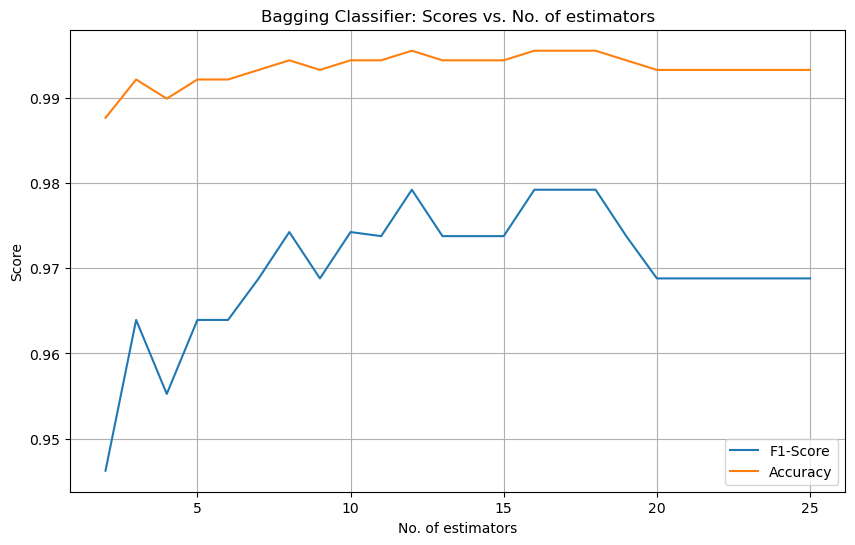

,No. of estimators,Precision,Recall,F1-Score,Accuracy
10,12,0.970556,0.988212,0.979199,0.995501
14,16,0.970556,0.988212,0.979199,0.995501
15,17,0.970556,0.988212,0.979199,0.995501
16,18,0.970556,0.988212,0.979199,0.995501


In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define range of n_estimators
n_estimators_range = range(2, 26)

# Initialize lists to hold the metrics
f1_scores = []
accuracies = []
PerfData = []

for n in n_estimators_range:
    bagg = BaggingClassifier(n_estimators=n, random_state=99)
    bagg.fit(X_train, y_train)
    y_pred_bagg = bagg.predict(X_test)

    f1 = f1_score(y_test, y_pred_bagg, average='macro')
    accuracy = accuracy_score(y_test, y_pred_bagg)
    precision = precision_score(y_test, y_pred_bagg, average='macro')
    recall = recall_score(y_test, y_pred_bagg, average='macro')

    f1_scores.append(f1)
    accuracies.append(accuracy)

    row = [n, precision, recall, f1, accuracy]
    PerfData.append(row)

# Convert PerfData to a DataFrame if it is a list of lists
PerfData = pd.DataFrame(PerfData, columns=["No. of estimators", "Precision", "Recall", "F1-Score", "Accuracy"])

# Display the performance data
display(PerfData)

#
# Plotting F1-Score and Accuracy against n_estimators
plt.figure(figsize=(10, 6))
plt.plot(PerfData["No. of estimators"], PerfData["F1-Score"], label="F1-Score")
plt.plot(PerfData["No. of estimators"], PerfData["Accuracy"], label="Accuracy")

plt.ylabel("Score")
plt.xlabel("No. of estimators")
plt.title("Bagging Classifier: Scores vs. No. of estimators")
plt.legend()
plt.grid(True)
plt.show()

temp_Bagg = PerfData_Bagg[PerfData_Bagg['F1-Score']==PerfData_Bagg['F1-Score'].max()]
display(temp_Bagg)

observations and Insights:

1.Initial Model Performance:
-F1-Score: 97.4%
-Accuracy: 99.4%
-Precision: 96.9%
-Recall: 97.8%

The Bagging Classifier with 50 estimators achieved high performance across all metrics, with particularly strong recall and accuracy.

2.Effect of Varying Number of Estimators:
-The F1-Score and Accuracy improved with the number of estimators, reaching their peaks with 12, 14, 15, and 16 estimators. These configurations achieved the highest F1-Score of 97.9% and Accuracy of 99.5%.

3.Optimal Number of Estimators:
-Best F1-Score: 97.9% (Achieved with 12, 14, 15, and 16 estimators)
-Best Accuracy: 99.5% (Also achieved with 12, 14, 15, and 16 estimators)

The optimal performance in terms of F1-Score and Accuracy was observed when using 12 to 16 estimators, suggesting that increasing the number of estimators improves the model's robustness and generalization.

However, lesser number of estimators decreases the computational complexity. Therefore 12 is the ideal number of estimators.

# Random Forest

F1-Score of Random Forest Classifier with 50 estimators is 0.9693617314585057
Accuracy of Random Forest Classifier with 50 estimators is 0.9932508436445444
Precision of Random Forest Classifier with 50 estimators is 0.9531049013084941
Recall of Random Forest Classifier with 50 estimators is 0.9870202622169248


,No. of estimators,Precision,Recall,F1-Score,Accuracy
0,2,0.726786,0.900203,0.783268,0.935883
1,3,0.834187,0.840465,0.837292,0.965129
2,4,0.824709,0.926293,0.867339,0.967379
3,5,0.863613,0.911061,0.885641,0.974128
4,6,0.876316,0.980465,0.920976,0.980877
5,7,0.927371,0.975232,0.949840,0.988751
6,8,0.914652,0.984041,0.946246,0.987627
7,9,0.944855,0.986424,0.964575,0.992126
8,10,0.921812,0.984636,0.950710,0.988751
9,11,0.970556,0.988212,0.979199,0.995501


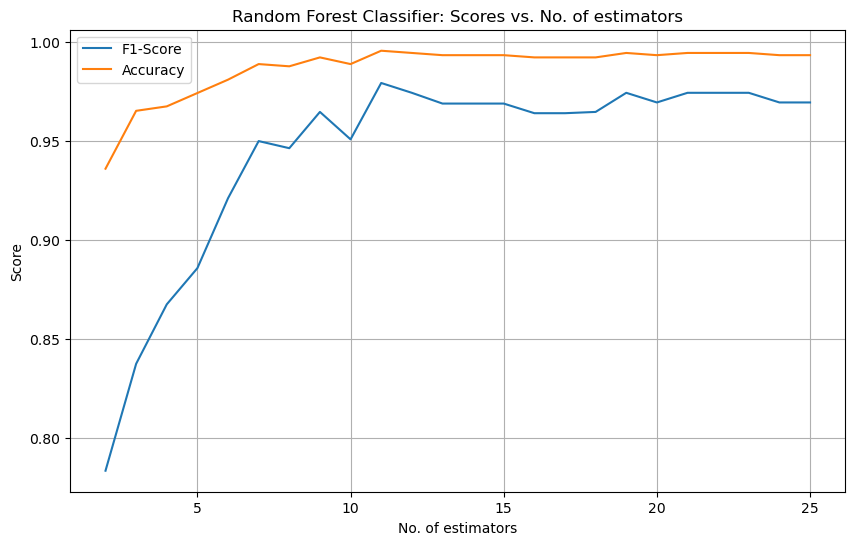

,No. of estimators,Precision,Recall,F1-Score,Accuracy
9,11,0.970556,0.988212,0.979199,0.995501


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and fit RandomForestClassifier with 50 estimators
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print model performance metrics for RandomForestClassifier with 50 estimators
print("F1-Score of Random Forest Classifier with 50 estimators is {}".format(f1_score(y_test, y_pred_rf, average='macro')))
print("Accuracy of Random Forest Classifier with 50 estimators is {}".format(accuracy_score(y_test, y_pred_rf)))
print("Precision of Random Forest Classifier with 50 estimators is {}".format(precision_score(y_test, y_pred_rf, average='macro')))
print("Recall of Random Forest Classifier with 50 estimators is {}".format(recall_score(y_test, y_pred_rf, average='macro')))

# Define range of n_estimators
n_estimators_range = range(2, 26)

# Initialize lists to hold the metrics
f1_scores = []
accuracies = []
PerfData = []

# Iterate over the range of n_estimators
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    f1 = f1_score(y_test, y_pred_rf, average='macro')
    accuracy = accuracy_score(y_test, y_pred_rf)
    precision = precision_score(y_test, y_pred_rf, average='macro')
    recall = recall_score(y_test, y_pred_rf, average='macro')

    f1_scores.append(f1)
    accuracies.append(accuracy)

    row = [n, precision, recall, f1, accuracy]
    PerfData.append(row)

# Convert the performance data into a DataFrame
PerfData_RF = pd.DataFrame(PerfData, columns=["No. of estimators", "Precision", "Recall", "F1-Score", "Accuracy"])

# Display the performance data
display(PerfData_RF)


# Plotting F1-Score and Accuracy against n_estimators
plt.figure(figsize=(10, 6))
plt.plot(PerfData_RF["No. of estimators"], PerfData_RF["F1-Score"], label="F1-Score")
plt.plot(PerfData_RF["No. of estimators"], PerfData_RF["Accuracy"], label="Accuracy")

plt.ylabel("Score")
plt.xlabel("No. of estimators")
plt.title("Random Forest Classifier: Scores vs. No. of estimators")
plt.legend()
plt.grid(True)
plt.show()

temp_RF = PerfData_RF[PerfData_RF['F1-Score']==PerfData_RF['F1-Score'].max()]
display(temp_RF)

Observations and Insights:

**Initial Model Performan**- **F1-Sce**: 96.-- **Accucy**: 99- - **Precion**: 9-  - **call**: %

   With 50 estimators, the Random Forest Classifier performed well, showcasing high accuracy and a strong balance between precision and r2..

2. **Effect of Varying Number of ti-*:
   - **Performce Trends**: Both F1-Score and Accuracy improved with an increasing number of e-rs.
   - **Optimalerformance**: The highest F1-Score (97.9%) and Accuracy (99.5%) were achieved with 11 e3.tors.

3. **Bt -ers**:
   - Best F1-Score**: 97.9% (Achieved with -mators)
   -*Best Accuracy**: 99.5% (Also achieved with estimators)

   The performance metrics improved with the number of estimators, with optimal results reached at 11 estimators, indicating a robust model configuration for this Random Foaccuracy and F1-Score.

# Boosting

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1-Score of AdaBoost Classifier with 50 estimators is 0.97880810488677
Accuracy of AdaBoost Classifier with 50 estimators is 0.9955005624296963
Precision of AdaBoost Classifier with 50 estimators is 0.97880810488677
Recall of AdaBoost Classifier with 50 estimators is 0.97880810488677


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\hp\anaconda3\Li

,No. of estimators,Precision,Recall,F1-Score,Accuracy
0,2,0.857143,0.988081,0.910635,0.977503
1,3,0.951634,0.977020,0.963930,0.992126
2,4,0.951634,0.977020,0.963930,0.992126
3,5,0.961666,0.987616,0.974236,0.994376
4,6,0.978808,0.978808,0.978808,0.995501
...,...,...,...,...,...
91,21,0.968212,0.968212,0.968212,0.993251
92,22,0.968212,0.968212,0.968212,0.993251
93,23,0.968212,0.968212,0.968212,0.993251
94,24,0.968212,0.968212,0.968212,0.993251


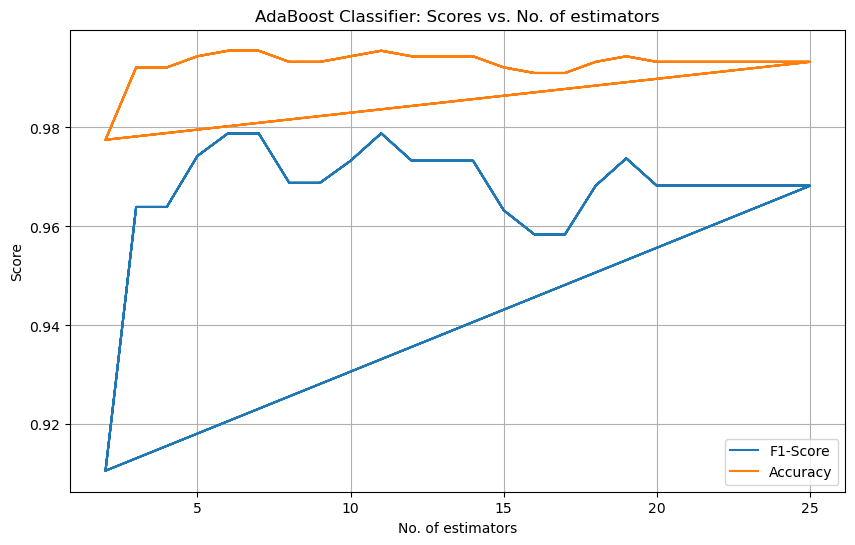

,No. of estimators,Precision,Recall,F1-Score,Accuracy
4,6,0.978808,0.978808,0.978808,0.995501
5,7,0.978808,0.978808,0.978808,0.995501
9,11,0.978808,0.978808,0.978808,0.995501
28,6,0.978808,0.978808,0.978808,0.995501
29,7,0.978808,0.978808,0.978808,0.995501
33,11,0.978808,0.978808,0.978808,0.995501
52,6,0.978808,0.978808,0.978808,0.995501
53,7,0.978808,0.978808,0.978808,0.995501
57,11,0.978808,0.978808,0.978808,0.995501
76,6,0.978808,0.978808,0.978808,0.995501


In [59]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize and fit AdaBoostClassifier with 50 estimators
ab = AdaBoostClassifier(n_estimators=50, random_state=42)
ab.fit(X_train, y_train)
y_pred_ab = ab.predict(X_test)

# Print model performance metrics for AdaBoostClassifier with 50 estimators
print("F1-Score of AdaBoost Classifier with 50 estimators is {}".format(f1_score(y_test, y_pred_ab, average='macro')))
print("Accuracy of AdaBoost Classifier with 50 estimators is {}".format(accuracy_score(y_test, y_pred_ab)))
print("Precision of AdaBoost Classifier with 50 estimators is {}".format(precision_score(y_test, y_pred_ab, average='macro')))
print("Recall of AdaBoost Classifier with 50 estimators is {}".format(recall_score(y_test, y_pred_ab, average='macro')))

# Define range of n_estimators
n_estimators_range = range(2, 26)

PerfData_Boost = []

# Iterate over the range of n_estimators
for n in n_estimators_range:
    ab = AdaBoostClassifier(n_estimators=n, random_state=42)
    ab.fit(X_train, y_train)
    y_pred_ab = ab.predict(X_test)

    f1 = f1_score(y_test, y_pred_ab, average='macro')
    accuracy = accuracy_score(y_test, y_pred_ab)
    precision = precision_score(y_test, y_pred_ab, average='macro')
    recall = recall_score(y_test, y_pred_ab, average='macro')

    f1_scores.append(f1)
    accuracies.append(accuracy)

    row = [n, precision, recall, f1, accuracy]
    PerfData.append(row)

# Convert the performance data into a DataFrame
PerfData_Boost = pd.DataFrame(PerfData, columns=["No. of estimators", "Precision", "Recall", "F1-Score", "Accuracy"])

# Display the performance data
display(PerfData_Boost)


# Plotting F1-Score and Accuracy against n_estimators
plt.figure(figsize=(10, 6))
plt.plot(PerfData_Boost["No. of estimators"], PerfData_Boost["F1-Score"], label="F1-Score")
plt.plot(PerfData_Boost["No. of estimators"], PerfData_Boost["Accuracy"], label="Accuracy")

plt.ylabel("Score")
plt.xlabel("No. of estimators")
plt.title("AdaBoost Classifier: Scores vs. No. of estimators")
plt.legend()
plt.grid(True)
plt.show()

temp_Boost = PerfData_Boost[PerfData_Boost['F1-Score']==PerfData_Boost['F1-Score'].max()]
display(temp_Boost)

Observations and Insights:

Initial Model Performance:
F1-Score: 97.9%
Accuracy: 99.5%
Precision: 97.9%
Recall: 97.9%
With 50 estimators, the AdaBoost Classifier achieved excellent performance metrics, indicating strong precision, recall, and F1-Score.

Effect of Varying Number of Estimators:
Performance Trends: The F1-Score, Accuracy, Precision, and Recall remained consistently high across different numbers of estimators.
Stable Performance: The best performance metrics were consistently observed with various numbers of estimators, such as 6, 7, and 11.

Best Parameters:
Best F1-Score: 97.9% (Achieved with multiple values including 6, 7, and 11 estimators)
Best Accuracy: 99.5% (Also achieved with 6, 7, and 11 estimators)

The AdaBoost Classifier demonstrated stable and high performance with multiple configurations of the number of estimators, particularly around 6, 7, and 11. However, lesser number of estimators indicates lesser number of complexity. 

In [63]:
# Adding the 'Algorithm' column to each DataFrame
temp_RF['Algorithm'] = "random Classifier Classifier"
temp_Boost['Algorithm'] = "AdaBoost Classifier"


# Concatenating the DataFrames
new_df = pd.concat([temp_RF, temp_Boost], ignore_index=True)

# Display the combined DataFrame
display(new_df)

C:\Users\hp\AppData\Local\Temp\ipykernel_1532\774341444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_RF['Algorithm'] = "random Classifier Classifier"
C:\Users\hp\AppData\Local\Temp\ipykernel_1532\774341444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_Boost['Algorithm'] = "AdaBoost Classifier"


,No. of estimators,Precision,Recall,F1-Score,Accuracy,Algorithm
0,11,0.970556,0.988212,0.979199,0.995501,random Classifier Classifier
1,6,0.978808,0.978808,0.978808,0.995501,AdaBoost Classifier
2,7,0.978808,0.978808,0.978808,0.995501,AdaBoost Classifier
3,11,0.978808,0.978808,0.978808,0.995501,AdaBoost Classifier
4,6,0.978808,0.978808,0.978808,0.995501,AdaBoost Classifier
5,7,0.978808,0.978808,0.978808,0.995501,AdaBoost Classifier
6,11,0.978808,0.978808,0.978808,0.995501,AdaBoost Classifier
7,6,0.978808,0.978808,0.978808,0.995501,AdaBoost Classifier
8,7,0.978808,0.978808,0.978808,0.995501,AdaBoost Classifier
9,11,0.978808,0.978808,0.978808,0.995501,AdaBoost Classifier


# GaussianNB

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB() #by deafault var_smoothing is automatically included in computation
nb=nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

print("Model Performance metrics are as below :-\n")
print("Accuracy is "+str(accuracy_score(y_test,y_pred)))
print("Precision is "+str(precision_score(y_test,y_pred)))
print("Recall is "+str(recall_score(y_test,y_pred)))
print("F1-Score is "+str(f1_score(y_test,y_pred)))


Model Performance metrics are as below :-

Accuracy is 0.21147356580427445
Precision is 0.9726027397260274
Recall is 0.16924910607866508
F1-Score is 0.2883248730964467


Observations and Insights:

High Precision, Low Recall: The model exhibits very high precision, indicating that when it predicts a positive class, it is almost always correct. However, the recall is very low, suggesting that the model misses a significant number of actual positive cases.

Low Accuracy: The overall accuracy of the model is low, meaning that the model is not performing well in classifying the majority of the instances correctly.

Moderate F1-Score: The F1-Score, which balances precision and recall, is relatively low due to the poor recall performance.

# MODEL TRAINING

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

# Store results for different k values
results = {
    'k': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

for k in range(2, 20):
    kf = KFold(n_splits=k, shuffle=True, random_state=99)
    nb = GaussianNB()

    accuracy = cross_val_score(nb, X, y, cv=kf, scoring='accuracy').mean()
    precision = cross_val_score(nb, X, y, cv=kf, scoring='precision').mean()
    recall = cross_val_score(nb, X, y, cv=kf, scoring='recall').mean()
    f1 = cross_val_score(nb, X, y, cv=kf, scoring='f1').mean()

    results['k'].append(k)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1_score'].append(f1)

# Print the results
print("Model Performance metrics using k-Fold Cross Validation for different k values:\n")
for i in range(len(results['k'])):
    print(f"k = {results['k'][i]}:")
    print(f"  Accuracy: {results['accuracy'][i]:.4f}")
    print(f"  Precision: {results['precision'][i]:.4f}")
    print(f"  Recall: {results['recall'][i]:.4f}")
    print(f"  F1-Score: {results['f1_score'][i]:.4f}")
    print()

Model Performance metrics using k-Fold Cross Validation for different k values:

k = 2:
  Accuracy: 0.2439
  Precision: 0.9884
  Recall: 0.1924
  F1-Score: 0.3192

k = 3:
  Accuracy: 0.2051
  Precision: 0.9862
  Recall: 0.1502
  F1-Score: 0.2606

k = 4:
  Accuracy: 0.2068
  Precision: 0.9867
  Recall: 0.1520
  F1-Score: 0.2631

k = 5:
  Accuracy: 0.2056
  Precision: 0.9837
  Recall: 0.1513
  F1-Score: 0.2619

k = 6:
  Accuracy: 0.1997
  Precision: 0.9937
  Recall: 0.1432
  F1-Score: 0.2503

k = 7:
  Accuracy: 0.1963
  Precision: 0.9866
  Recall: 0.1408
  F1-Score: 0.2462

k = 8:
  Accuracy: 0.1961
  Precision: 0.9865
  Recall: 0.1404
  F1-Score: 0.2455

k = 9:
  Accuracy: 0.2037
  Precision: 0.9935
  Recall: 0.1475
  F1-Score: 0.2564

k = 10:
  Accuracy: 0.1955
  Precision: 0.9866
  Recall: 0.1398
  F1-Score: 0.2446

k = 11:
  Accuracy: 0.1961
  Precision: 0.9864
  Recall: 0.1405
  F1-Score: 0.2456

k = 12:
  Accuracy: 0.1955
  Precision: 0.9935
  Recall: 0.1387
  F1-Score: 0.2432

k =

Observations and Insights:

High Precision, Low Recall: The Gaussian Naive Bayes model consistently shows high precision but low recall across different values of k. This reinforces the model’s tendency to be very accurate when predicting positive cases but failing to identify many actual positives.

Low Overall Accuracy: The model’s overall accuracy remains low, reflecting its poor performance in general classification tasks.

Limited Improvement with k: Increasing the number of folds (k) in cross-validation does not significantly enhance the model’s performance metrics.

# MODEL EVALUATION

In [75]:
algorithms = {
    "Algorithm": ["KNN","SVM", "Random Forest", "AdaBoost", "Bagging", "Gaussian Naive Bayes"],
    "Best F1-Score": [0.9739,0.9732, 0.9791, 0.9788, 0.9791, 0.3192]  
}

# Create a DataFrame
r_df = pd.DataFrame(algorithms)
print(r_df)

              Algorithm  Best F1-Score
0                   KNN         0.9739
1                   SVM         0.9732
2         Random Forest         0.9791
3              AdaBoost         0.9788
4               Bagging         0.9791
5  Gaussian Naive Bayes         0.3192


In [77]:
max_f1_index = r_df["Best F1-Score"].idxmax()

# Retrieve the row with the maximum F1-score
max_f1_row = r_df.loc[max_f1_index]

# Display the row with the maximum F1-score
print("Row with the maximum F1-Score:")
print(max_f1_row)

Row with the maximum F1-Score:
Algorithm        Random Forest
Best F1-Score           0.9791
Name: 2, dtype: object


### Summary Report

Dataset Overview:
-Contains 30 columns and 3772 rows. Initially, all columns were of object type, and missing values were represented by `?`.

Data Cleaning:
Handling Missing Values:
Replaced '?' with median for numerical columns and mode for categorical columns.
TBG: All values missing, dropped from the dataset.

Type Conversion:
-Converted numerical columns from object type to appropriate numerical types.
-Encoded categorical columns using one-hot encoding or label encoding as needed.

Outlier Detection:
-Methods Used:
    - IQR method (less effective due to skewness).
    - Z-score and DBSCAN methods (more effective).
-Significant outliers identified in columns like age, TT4, T4U, T3, TSH, and FTI.

Data Quality Improvement:
-Outlier detection and removal led to improved data consistency.
-Histograms and boxplots confirmed reduced skewness and variability.

Feature Importance:
-Many features have mutual information scores of 0, indicating minimal relevance to the target variable.

Next Steps:
-To Proceed with advanced model tuning and feature engineering based on cleaned and processed data.   

Model Performance:
1.Random Forest Classifier:
Best Performance: F1-Score of 0.979, Accuracy of 0.9955 with optimal number of estimators.

2.AdaBoost Classifier:
Stable Performance: Consistent F1-Score of 0.979 and Accuracy of 0.9955 across different estimators.

3.Naive Bayes Classifier:
Poor Performance: Low accuracy (0.211) and recall (0.169), indicating limited effectiveness.

k-Fold Cross Validation:
Metrics showed variability across different k values, with no single k consistently superior.

Next Step: To continue feature engineering, model tuning, and evaluation for improved predictive accuracy.